In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
%matplotlib inline
sn.set_theme(style = 'ticks')


from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#from warnings import filterwarnings
#filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## ***Problem 1:***

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [5]:
elec_data = pd.read_csv('Election_Data.csv')

In [6]:
elec_data.shape

(1525, 10)

In [7]:
elec_data.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [8]:
elec_data.drop('Unnamed: 0', axis = 1, inplace=True)

In [9]:
elec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
elec_data[elec_data.duplicated()]

vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [11]:
elec_data.drop_duplicates(inplace = True)

In [12]:
elec_data.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic.cond.national   1517.0   3.245221   0.881792   1.0   3.0   3.0   4.0   
economic.cond.household  1517.0   3.137772   0.931069   1.0   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political.knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [13]:
elec_data.describe(include = 'object').T

count unique     top  freq
vote    1517      2  Labour  1057
gender  1517      2  female   808

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

In [14]:
elec_data_num = elec_data.select_dtypes('int')
elec_data_cat = elec_data.select_dtypes('object')

***Univariate Analysis***

In [15]:
def univariate_analysis(column):
    
   
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,3))
    
    plt.suptitle('Univariate Analysis of  ' +column, fontsize = 15)
    
    sn.histplot(elec_data_num[column], kde=True, ax=axs[0], palette = 'viridis', shrink = 5, bins = 200)
    
    sn.boxplot(x=elec_data_num[column], ax=axs[1], palette = 'magma', showmeans = True)
    
    plt.tight_layout()

In [16]:
unilist = list(elec_data_num.columns.values)

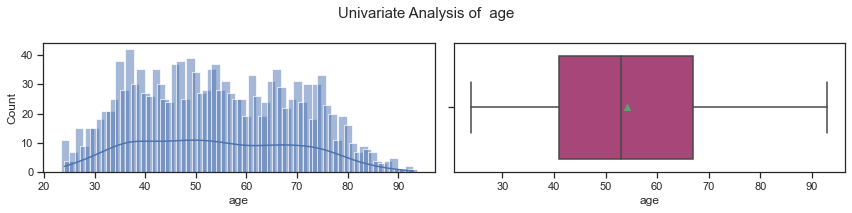

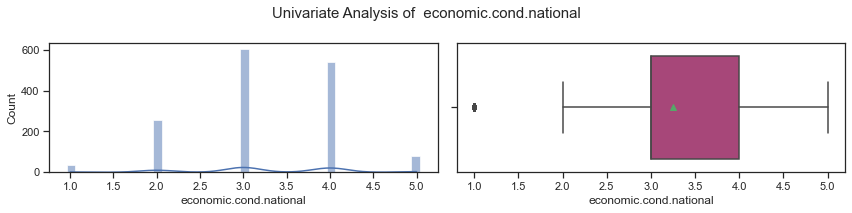

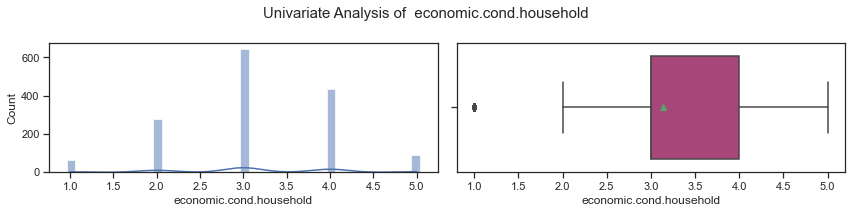

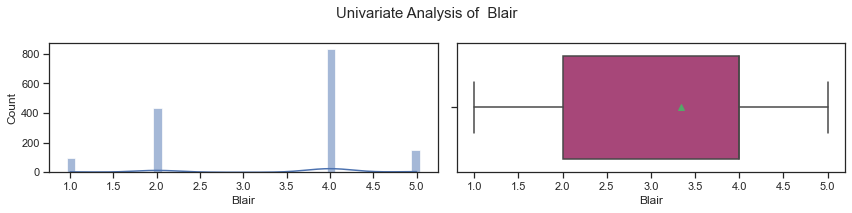

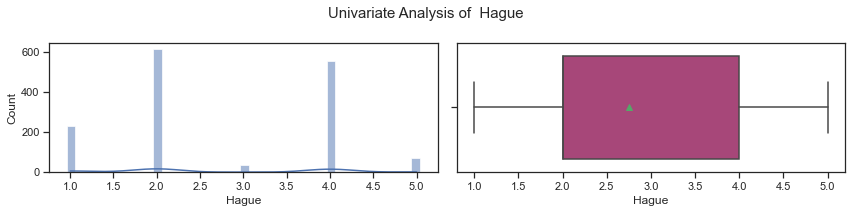

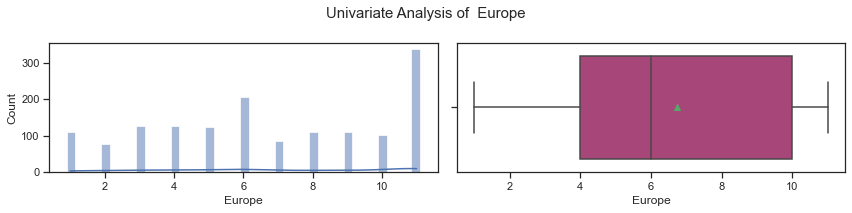

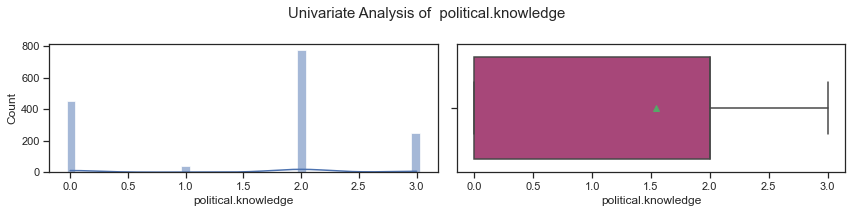

In [17]:
for i in unilist:
    univariate_analysis(i)

In [18]:
pd.DataFrame(elec_data_num.skew()).T

age  economic.cond.national  economic.cond.household     Blair  \
0  0.1398               -0.238474                -0.144148 -0.539514   

      Hague    Europe  political.knowledge  
0  0.146191 -0.141891            -0.422928

### ***Inference***

In [19]:
elec_data_cat.columns

Index(['vote', 'gender'], dtype='object')

In [20]:
elec_data_cat.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [21]:
elec_data_cat.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

In [22]:
fig = px.pie(elec_data_cat, names = 'vote', height = 500, width = 500, color_discrete_sequence = px.colors.qualitative.Alphabet)
fig.update_traces(textfont_size = 15)
fig.show()

In [23]:
fig = px.pie(elec_data_cat, names = 'gender', height = 500, width = 500, color_discrete_map={'female': 'red', 'male': 'green'})
fig.update_traces(textfont_size = 15)
fig.show()

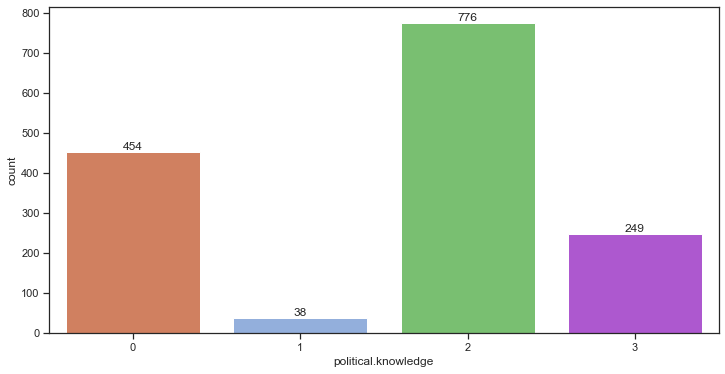

In [24]:
fig,axes = plt.subplots(figsize=(12,6))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3']

ax = sn.countplot(x='political.knowledge',data=elec_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)

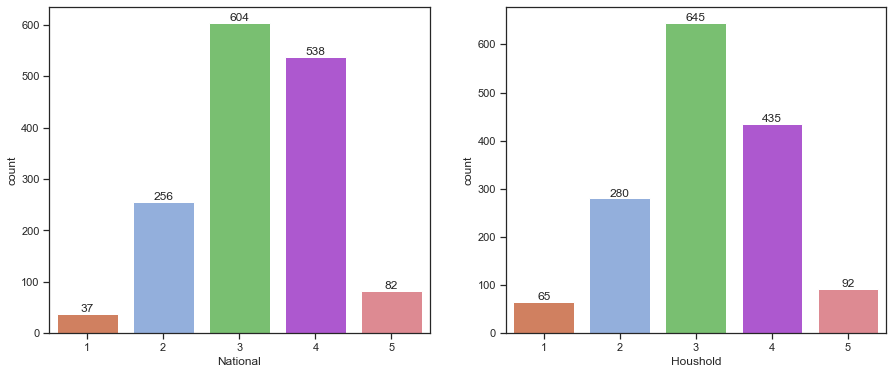

In [25]:
plt.figure(figsize = (15,6))
plt.subplot(121)
ax1 = sn.countplot(x='economic.cond.national',data=elec_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3', '#eb7c87'])
for container in ax1.containers:
    ax1.bar_label(container)

plt.xlabel('National')

plt.subplot(122)    
ax1 = sn.countplot(x='economic.cond.household',data=elec_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3', '#eb7c87'])
for container in ax1.containers:
    ax1.bar_label(container)
plt.xlabel('Houshold')

#plt.suptitle('Frequency of Economic Conditions', fontsize = 15)
plt.show()

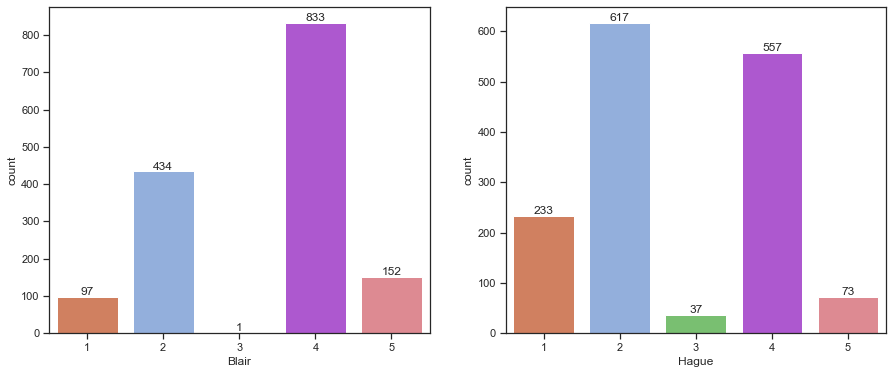

In [26]:
plt.figure(figsize = (15,6))
plt.subplot(121)
ax1 = sn.countplot(x='Blair',data=elec_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3', '#eb7c87'])
for container in ax1.containers:
    ax1.bar_label(container)

plt.subplot(122)
ax1 = sn.countplot(x='Hague',data=elec_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3', '#eb7c87'])
for container in ax1.containers:
    ax1.bar_label(container)
    
#plt.suptitle('Frequency of Assessments', fontsize = 15)
plt.show()

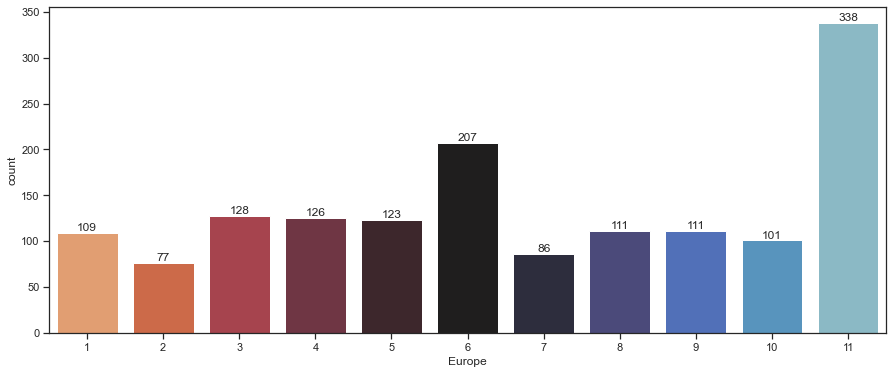

In [27]:
plt.figure(figsize = (15,6))
ax3 = sn.countplot(x='Europe',data=elec_data, palette='icefire_r')
for container in ax3.containers:
    ax3.bar_label(container)


### ***Bivariate Analysis***

C:\Users\KUNALS~1\AppData\Local\Temp/ipykernel_10960/858807737.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

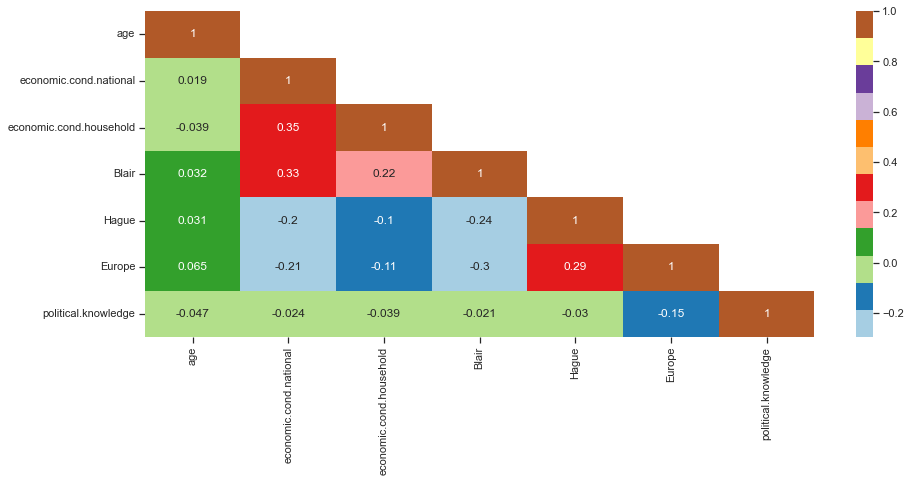

In [28]:
corr = elec_data_num.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool), k=1)

plt.figure(figsize = (15,6))
sn.heatmap(corr, mask = mask, annot = True, fmt = '.2g', cmap = 'Paired')

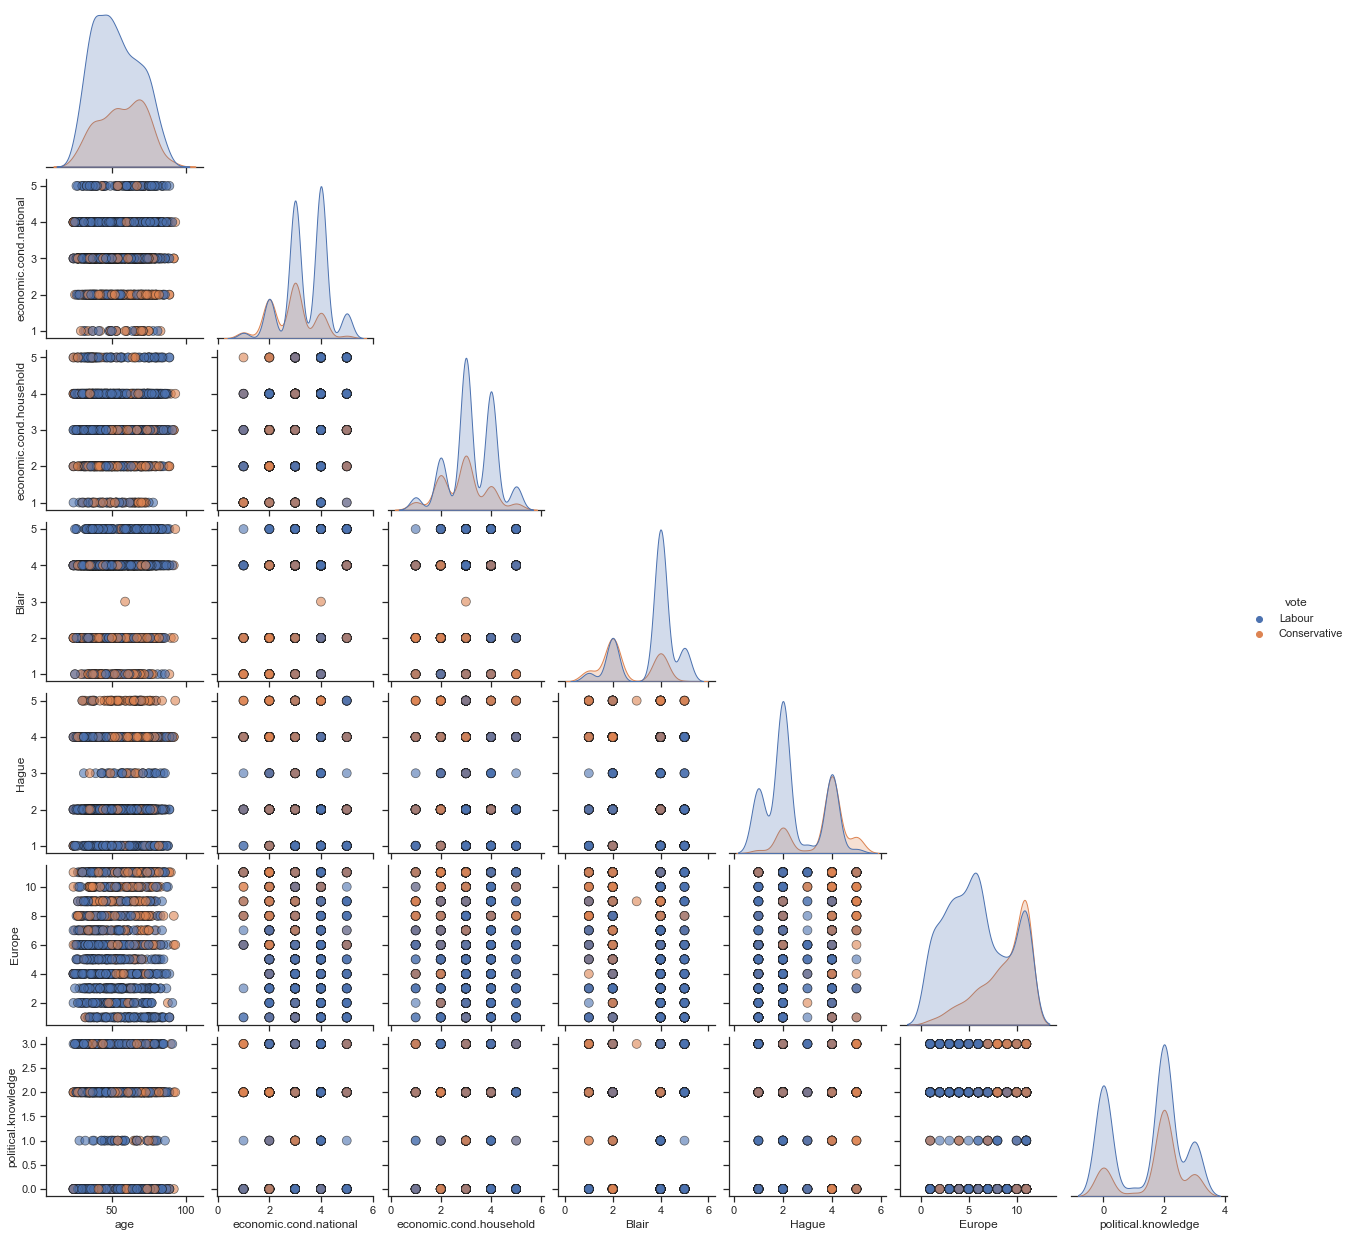

In [29]:
sn.pairplot(elec_data, hue = 'vote', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, corner = True)

*****

### ***Bivariate Analysis***

In [30]:
pd.DataFrame(elec_data.groupby(['vote', 'gender'])['age'].count())

age
vote         gender     
Conservative female  257
             male    203
Labour       female  551
             male    506

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



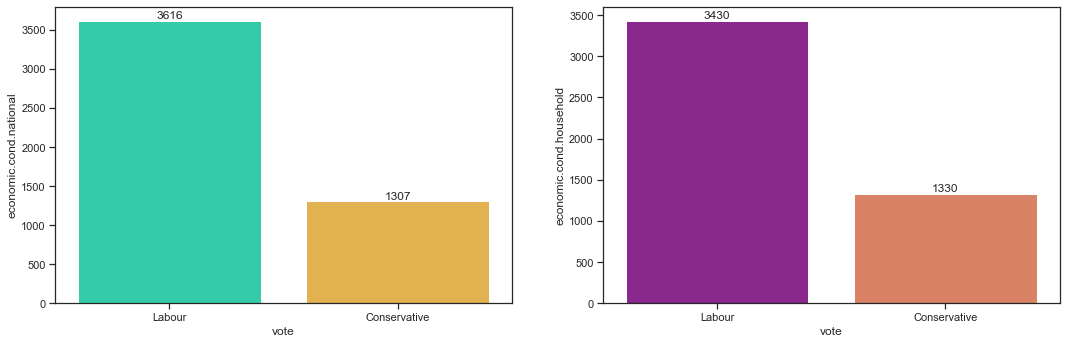

In [31]:
plt.figure(figsize = (18,12))
plt.subplot(221)
ax7 = sn.barplot(elec_data.vote, elec_data['economic.cond.national'], ci = None, palette = 'turbo', seed = 200, estimator = np.sum)
for container in ax7.containers:
    ax7.bar_label(container)
 
plt.subplot(222)
ax8 = sn.barplot(elec_data.vote, elec_data['economic.cond.household'], ci = None, palette = 'plasma', estimator = np.sum)
for container in ax8.containers:
    ax8.bar_label(container)

In [32]:
round(pd.DataFrame(elec_data.groupby(['vote'])[['economic.cond.national', 'economic.cond.household']].sum().sort_index()),2)

economic.cond.national  economic.cond.household
vote                                                         
Conservative                    1307                     1330
Labour                          3616                     3430

In [33]:
pd.DataFrame(elec_data.groupby('vote')['economic.cond.household'].value_counts())

economic.cond.household
vote         economic.cond.household                         
Conservative 3                                            197
             2                                            126
             4                                             86
             1                                             28
             5                                             23
Labour       3                                            448
             4                                            349
             2                                            154
             5                                             69
             1                                             37

In [34]:
pd.DataFrame(elec_data.groupby('vote')['economic.cond.national'].value_counts())

economic.cond.national
vote         economic.cond.national                        
Conservative 3                                          199
             2                                          140
             4                                           91
             1                                           21
             5                                            9
Labour       4                                          447
             3                                          405
             2                                          116
             5                                           73
             1                                           16

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



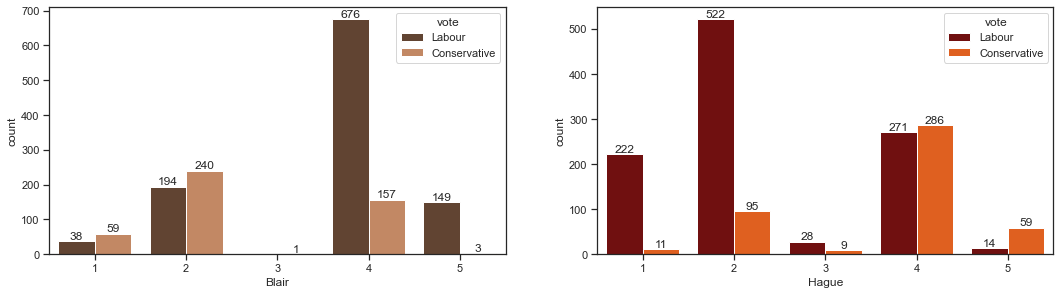

In [35]:
plt.figure(figsize = (18,10))
plt.subplot(221)
ax5 = sn.countplot(elec_data.Blair, hue = elec_data.vote, palette = 'copper')
for container in ax5.containers:
    ax5.bar_label(container)
    
plt.subplot(222)
ax6 = sn.countplot(elec_data.Hague, hue = elec_data.vote, palette = 'gist_heat')
for container in ax6.containers:
    ax6.bar_label(container)

In [36]:
round(pd.DataFrame(elec_data.groupby('vote')[['Blair', 'Hague']].sum()),2)

Blair  Hague
vote                      
Conservative   1185   1667
Labour         3875   2504

In [37]:
pd.DataFrame(elec_data.groupby('vote')['Hague'].value_counts())

Hague
vote         Hague       
Conservative 4        286
             2         95
             5         59
             1         11
             3          9
Labour       2        522
             4        271
             1        222
             3         28
             5         14

In [38]:
pd.DataFrame(elec_data.groupby('vote')['Blair'].value_counts())

Blair
vote         Blair       
Conservative 2        240
             4        157
             1         59
             5          3
             3          1
Labour       4        676
             2        194
             5        149
             1         38

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



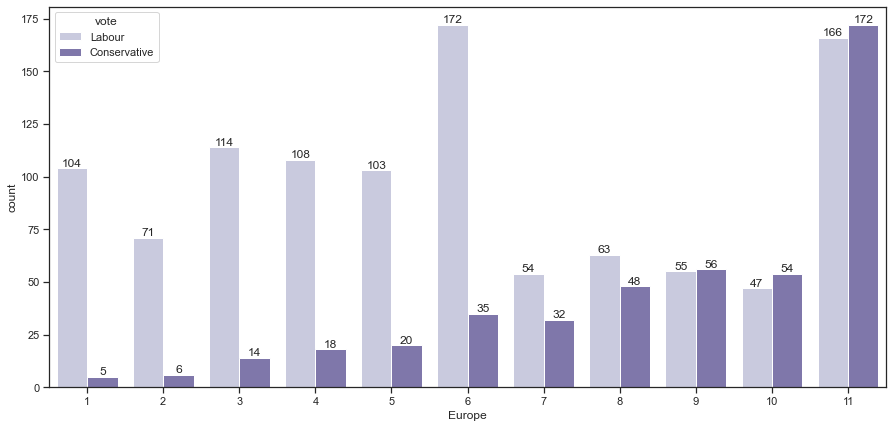

In [39]:
plt.figure(figsize = (15,7))
ax4 = sn.countplot(elec_data.Europe, hue = elec_data.vote, palette = 'Purples')

for container in ax4.containers:
    ax4.bar_label(container)

In [40]:
pd.DataFrame(elec_data.groupby('vote')['Europe'].value_counts().sort_index())

Europe
vote         Europe        
Conservative 1            5
             2            6
             3           14
             4           18
             5           20
             6           35
             7           32
             8           48
             9           56
             10          54
             11         172
Labour       1          104
             2           71
             3          114
             4          108
             5          103
             6          172
             7           54
             8           63
             9           55
             10          47
             11         166

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



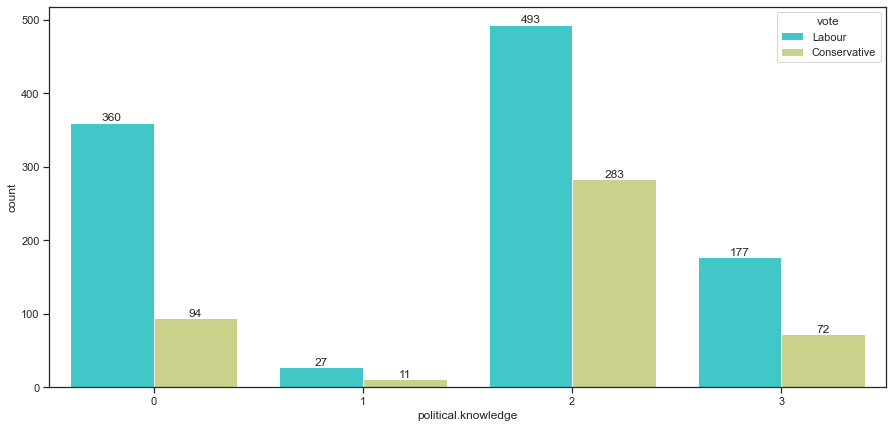

In [41]:
plt.figure(figsize = (15,7))
ax2 = sn.countplot(elec_data['political.knowledge'], hue = elec_data.vote, palette = 'rainbow')

for container in ax2.containers:
    ax2.bar_label(container)

### **Multivariate Analysis**

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



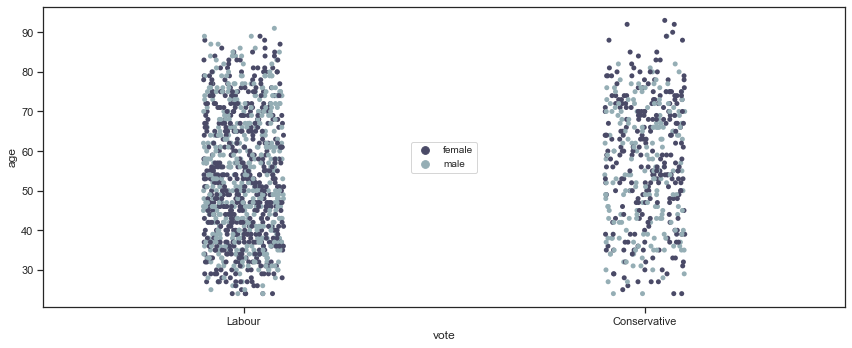

In [42]:
plt.figure(figsize=(12,5))

sn.stripplot(elec_data.vote, elec_data.age, hue = elec_data.gender, palette = 'bone')
plt.legend(fontsize = 10, loc = 'center')

plt.legend(fontsize = 10, loc = 'center')
plt.tight_layout()
plt.show()

### **1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.**

In [43]:
for i in elec_data.columns:
    if elec_data[i].dtype == 'object':
        elec_data[i] = pd.Categorical(elec_data[i]).codes

In [44]:
elec_data.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2       0  
1       5                    2       1  
2       3                    2       1  
3       4                    0       0  
4       6                    2       1

In [45]:
elec_data.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [46]:
elec_data.gender.value_counts()

0    808
1    709
Name: gender, dtype: int64

In [47]:
pd.DataFrame(elec_data.dtypes).T

vote    age economic.cond.national economic.cond.household  Blair  Hague  \
0  int8  int64                  int64                   int64  int64  int64   

  Europe political.knowledge gender  
0  int64               int64   int8

In [48]:
## Scaling

scaler = StandardScaler()
#elec_data = elec_data.reshape(-1,1)
#elec_data.age = scaler.fit_transform(elec_data.age)
#elec_data['economic.cond.national'] = scaler.fit_transform(elec_data['economic.cond.national'])
#elec_data['economic.cond.household'] = scaler.fit_transform(elec_data['economic.cond.household'])
#elec_data.Blair = scaler.fit_transform(elec_data.Blair)
#elec_data.Europe = scaler.fit_transform(elec_data.Europe)
#elec_data['political.knowledge'] = scaler.fit_transform(elec_data['political.knowledge'])
#elec_data.gender = scaler.fit_transform(elec_data.gender)

In [49]:
x = elec_data.drop('vote', axis = 1)
y = elec_data.pop('vote')

In [50]:
print('Mean before scaling for Independent variables are: {}'.format(round(x.mean(),2)), '\n')
print('Standard Deviation before scaling for Independent variables are {}'.format(round(x.std(),2)))
print('Variance before scaling among Independent variables are {}'.format(round(x.var(),2)))

Mean before scaling for Independent variables are: age                        54.24
economic.cond.national      3.25
economic.cond.household     3.14
Blair                       3.34
Hague                       2.75
Europe                      6.74
political.knowledge         1.54
gender                      0.47
dtype: float64 

Standard Deviation before scaling for Independent variables are age                        15.70
economic.cond.national      0.88
economic.cond.household     0.93
Blair                       1.17
Hague                       1.23
Europe                      3.30
political.knowledge         1.08
gender                      0.50
dtype: float64
Variance before scaling among Independent variables are age                        246.54
economic.cond.national       0.78
economic.cond.household      0.87
Blair                        1.38
Hague                        1.52
Europe                      10.88
political.knowledge          1.18
gender                       0.

In [51]:
x = x.apply(zscore)

In [52]:
round(x.head(),2)

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0 -0.72                   -0.28                    -0.15   0.57  -1.42   
1 -1.16                    0.86                     0.93   0.57   1.01   
2 -1.23                    0.86                     0.93   1.42  -0.61   
3 -1.93                    0.86                    -1.22  -1.14  -1.42   
4 -0.84                   -1.41                    -1.22  -1.99  -1.42   

   Europe  political.knowledge  gender  
0   -1.44                 0.42   -0.94  
1   -0.53                 0.42    1.07  
2   -1.13                 0.42    1.07  
3   -0.83                -1.42   -0.94  
4   -0.22                 0.42    1.07

In [53]:
print('Mean after scaling for Independent variables are: {}'.format(round(x.mean(),2)), '\n')
print('Standard Deviation after scaling for Independent variables are {}'.format(round(x.std(),2)))
print('Variance after scaling among Independent variables are {}'.format(round(x.var(),2)))

Mean after scaling for Independent variables are: age                        0.0
economic.cond.national    -0.0
economic.cond.household   -0.0
Blair                     -0.0
Hague                      0.0
Europe                     0.0
political.knowledge       -0.0
gender                     0.0
dtype: float64 

Standard Deviation after scaling for Independent variables are age                        1.0
economic.cond.national     1.0
economic.cond.household    1.0
Blair                      1.0
Hague                      1.0
Europe                     1.0
political.knowledge        1.0
gender                     1.0
dtype: float64
Variance after scaling among Independent variables are age                        1.0
economic.cond.national     1.0
economic.cond.household    1.0
Blair                      1.0
Hague                      1.0
Europe                     1.0
political.knowledge        1.0
gender                     1.0
dtype: float64


In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=1, stratify = y)

In [55]:
print('Observations of Xtrain are {}'.format(xtrain.shape[0]), 'and columns are {}'.format(xtrain.shape[1]))
print('Observations of Xtest are {}'.format(xtest.shape[0]), 'and columns are {}'.format(xtest.shape[1]))
print('Observations of Ytrain are {}'.format(ytrain.shape[0]))
print('Observations of Ytest are {}'.format(ytrain.shape[0]))

Observations of Xtrain are 1061 and columns are 8
Observations of Xtest are 456 and columns are 8
Observations of Ytrain are 1061
Observations of Ytest are 1061


### **1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)**

In [56]:
##Logit

logit = LogisticRegression(penalty = 'l2', tol = 0.001, solver = 'liblinear',random_state=1)
logit.fit(xtrain, ytrain)

LogisticRegression(random_state=1, solver='liblinear', tol=0.001)

In [57]:
### Accuracy for Logit Model

print('Accuracy for Trained Logit Model is:', round(logit.score(xtrain, ytrain),2))
print('Accuracy for Test Logit Model is:', round(logit.score(xtest, ytest),2))

Accuracy for Trained Logit Model is: 0.83
Accuracy for Test Logit Model is: 0.86


In [58]:
# Checking coeff

for idx, col_name in enumerate(xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, logit.coef_[0][idx]))

The coefficient for age is -0.20690201746712197
The coefficient for economic.cond.national is 0.30533353832216586
The coefficient for economic.cond.household is 0.03201194625957863
The coefficient for Blair is 0.6414029684685899
The coefficient for Hague is -1.045799176369226
The coefficient for Europe is -0.677202204363256
The coefficient for political.knowledge is -0.43453722314224574
The coefficient for gender is 0.024656814856344706


In [59]:
## LDA

lda = LinearDiscriminantAnalysis(tol = 0.001, solver = 'svd', shrinkage = None)
lda.fit(xtrain, ytrain)

LinearDiscriminantAnalysis(tol=0.001)

In [60]:
### Accuracy for LDA model

print('Accuracy for Trained LDA Model is:', round(lda.score(xtrain, ytrain),2))
print('Accuracy for Test LDA Model is:', round(lda.score(xtest, ytest),2))

Accuracy for Trained LDA Model is: 0.82
Accuracy for Test LDA Model is: 0.85


### **1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)**

In [61]:
scores = []

for k in np.arange(5,30,2):
    knn = KNeighborsClassifier(n_neighbors = k, weights='distance', metric = 'euclidean')
    knn.fit(xtrain, ytrain)
    scores.append(knn.score(xtest, ytest))
    mce = 1 - knn.score(xtest, ytest)
    print('For K= {}'.format(k), '\n')
    print('Testing Scores are: {}'.format(knn.score(xtest, ytest)))
    print('Classification error are: {}'.format(mce))
    print('\n')

For K= 5 

Testing Scores are: 0.831140350877193
Classification error are: 0.16885964912280704


For K= 7 

Testing Scores are: 0.8421052631578947
Classification error are: 0.1578947368421053


For K= 9 

Testing Scores are: 0.8508771929824561
Classification error are: 0.14912280701754388


For K= 11 

Testing Scores are: 0.8530701754385965
Classification error are: 0.14692982456140347


For K= 13 

Testing Scores are: 0.8596491228070176
Classification error are: 0.14035087719298245


For K= 15 

Testing Scores are: 0.8596491228070176
Classification error are: 0.14035087719298245


For K= 17 

Testing Scores are: 0.8640350877192983
Classification error are: 0.13596491228070173


For K= 19 

Testing Scores are: 0.8596491228070176
Classification error are: 0.14035087719298245


For K= 21 

Testing Scores are: 0.8618421052631579
Classification error are: 0.13815789473684215


For K= 23 

Testing Scores are: 0.8574561403508771
Classification error are: 0.14254385964912286


For K= 25 

Tes

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



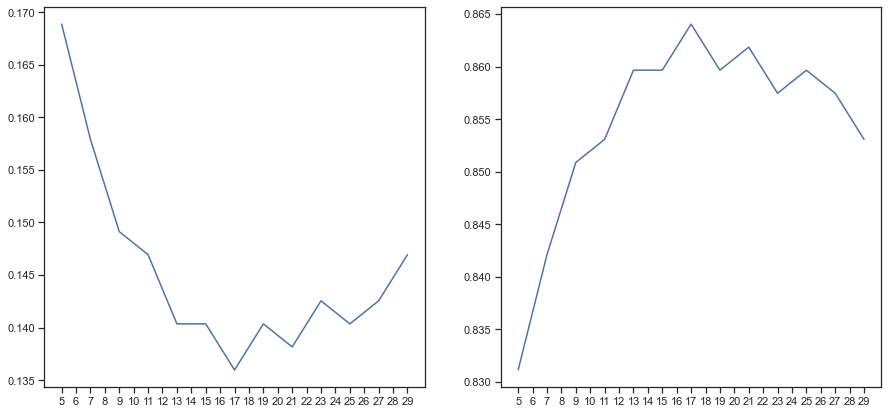

In [62]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sn.lineplot(np.arange(5,30,2),[1- x for x in scores] , palette = 'rainbow')
plt.xticks(np.arange(5,30))

plt.subplot(122)
sn.lineplot(np.arange(5,30,2), scores, palette = 'rainbow')
plt.xticks(np.arange(5,30))
plt.show()

**[At k = 17, we can observe highest scores i.e. 86% approx. with almost 14% error post of which data seems to be dropping, hence, we can choose optimal value as 17.]**

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=17, n_jobs=1, weights='distance', metric = 'euclidean')
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=17,
                     weights='distance')

In [64]:
### Accuracy for KNN Model

print('Accuracy for Trained KNN Model is:', round(knn_model.score(xtrain, ytrain),2))
print('Accuracy for Test KNN Model is:', round(knn_model.score(xtest, ytest),2))

Accuracy for Trained KNN Model is: 1.0
Accuracy for Test KNN Model is: 0.86


In [65]:
ytrain_predict_knn = knn_model.predict(xtrain)
ytest_predict_knn = knn_model.predict(xtest)

ytrain_predictprob_knn = knn_model.predict_proba(xtrain)
ytest_predictprob_knn = knn_model.predict_proba(xtest)

In [66]:
pd.DataFrame(ytrain_predictprob_knn).T

0     1     2     3     4     5     6     7     8     9     10    11    \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   
1   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   1.0   0.0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
1   1.0   1.0   1.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
1   0.0   1.0   1.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   1.0   1.0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
1   0.0   1.0   1.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   1.0   1.0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0   0.0   
1   1.0   1.0   0.0   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   1.0   0.0   
1   1.0   0.0   1.0   1.0   1.0   1.0   0.0   1.0   0.0   1.0   0.0   1.0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   1.0   1.0   1.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   

   108   109   110   111   112   113   114   115   116   117   118   119   \
0   1.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   
1   0.0   1.0   0.0   1.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0   

   120   121   122   123   124   125   126   127   128   129   130   131   \
0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   132   133   134   135   136   137   138   139   140   141   142   143   \
0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   
1   1.0   0.0   1.0   0.0   1.0   1.0   1.0   1.0   0.0   1.0   0.0   1.0   

   144   145   146   147   148   149   150   151   152   153   154   155   \
0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   1.0   1.0   0.0   
1   1.0   1.0   1.0   0.0   1.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   

   156   157   158   159   160   161   162   163   164   165   166   167   \
0   0.0   1.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0   1.0   1.0   1.0   
1   1.0   0.0   1.0   0.0   0.0   1.0   0.0   1.0   1.0   0.0   0.0   0.0   

   168   169   170   171   172   173   174   175   176   177   178   179   \
0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   1.0   0.0   
1   1.0   1.0   1.0   0.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   1.0   

   180   181   182   183   184   185   186   187   188   189   190   191   \
0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   
1   0.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0   

   192   193   194   195   196   197   198   199   200   201   202   203   \
0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   
1   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   1.0   1.0   

   204   205   206   207   208   209   210   211   212   21

In [67]:
pd.DataFrame(ytest_predictprob_knn).T

0         1         2    3         4         5         6    7    \
0  0.206662  0.699532  0.134355  0.0  0.101276  0.072759  0.699478  0.0   
1  0.793338  0.300468  0.865645  1.0  0.898724  0.927241  0.300522  1.0   

        8         9         10   11        12        13   14        15   \
0  0.113605  0.413954  0.040685  0.0  0.905718  0.171698  0.0  0.389313   
1  0.886395  0.586046  0.959315  1.0  0.094282  0.828302  1.0  0.610687   

       16        17        18        19        20        21        22   \
0  0.05455  0.396269  0.888911  0.087703  0.442912  0.767142  0.504441   
1  0.94545  0.603731  0.111089  0.912297  0.557088  0.232858  0.495559   

        23        24        25        26       27        28        29   \
0  0.107073  0.822818  0.058313  0.921299  0.48804  0.055442  0.121113   
1  0.892927  0.177182  0.941687  0.078701  0.51196  0.944558  0.878887   

        30        31        32       33        34       35        36   \
0  0.061876  0.052976  0.774486  0.66864  0.537824  0.37339  0.406838   
1  0.938124  0.947024  0.225514  0.33136  0.462176  0.62661  0.593162   

        37        38        39   40        41   42        43        44   \
0  0.881375  0.054315  0.223142  0.0  0.227475  0.0  0.457263  0.734467   
1  0.118625  0.945685  0.776858  1.0  0.772525  1.0  0.542737  0.265533   

        45        46        47        48        49   50        51        52   \
0  0.094343  0.123413  0.113294  0.119623  0.044765  0.0  0.826909  0.122024   
1  0.905657  0.876587  0.886706  0.880377  0.955235  1.0  0.173091  0.877976   

        53   54        55        56   57        58        59        60   \
0  0.499424  0.0  0.528373  0.289802  0.0  0.230462  0.567838  0.052255   
1  0.500576  1.0  0.471627  0.710198  1.0  0.769538  0.432162  0.947745   

        61   62        63        64        65        66        67   68   \
0  0.255102  0.0  0.802054  0.075365  0.066031  0.349782  0.056919  0.0   
1  0.744898  1.0  0.197946  0.924635  0.933969  0.650218  0.943081  1.0   

        69        70       71        72        73       74        75   \
0  0.855035  0.273545  0.52623  0.715342  0.052028  0.17509  0.612583   
1  0.144965  0.726455  0.47377  0.284658  0.947972  0.82491  0.387417   

        76        77        78       79        80        81   82   83   \
0  0.117009  0.073103  0.847931  0.10888  0.108072  0.227198  0.0  0.0   
1  0.882991  0.926897  0.152069  0.89112  0.891928  0.772802  1.0  1.0   

        84   85       86   87        88        89   90   91        92   \
0  0.053324  0.0  0.94864  0.0  0.779117  0.172811  0.0  0.0  0.870149   
1  0.946676  1.0  0.05136  1.0  0.220883  0.827189  1.0  1.0  0.129851   

        93   94   95   96        97        98        99        100       101  \
0  0.424086  0.0  0.0  0.0  0.237344  0.353786  0.156262  0.181754  0.159989   
1  0.575914  1.0  1.0  1.0  0.762656  0.646214  0.843738  0.818246  0.840011   

   102      103       104  105       106  107       108       109       110  \
0  0.0  0.11713  0.045052  0.0  0.316603  0.0  0.119694  0.277009  0.051647   
1  1.0  0.88287  0.954948  1.0  0.683397  1.0  0.880306  0.722991  0.948353   

        111  112       113  114       115  116       117      118       119  \
0  0.953625  0.0  0.376204  0.0  0.895062  0.0  0.315549  0.41449  0.051698   
1  0.046375  1.0  0.623796  1.0  0.104938  1.0  0.684451  0.58551  0.948302   

        120       121       122       123  124       125       126       127  \
0  0.212484  0.595035  0.681495  0.202171  0.0  0.637754  0.234734  0.075111   
1  0.787516  0.404965  0.318505  0.797829  1.0  0.362246  0.765266  0.924889   

       128       129  130       131       132       133       134       135  \
0  0.13731  0.114659  0.0  0.049873  0.211527  0.160731  0.854548  0.345784   
1  0.86269  0.885341  1.0  0.950127  0.788473  0.839269  0.145452  0.654216   

        136       137       138       139       140      141       142  \
0  0.774171  0.304604  0.673356  0.

**GaussianNB**

In [68]:
gb = GaussianNB()
gb.fit(xtrain, ytrain)

GaussianNB()

In [69]:
### Accuracy for GB Model

print('Accuracy for Trained GB Model is:', round(gb.score(xtrain, ytrain),2)*100)
print('Accuracy for Test GB Model is:', round(gb.score(xtest, ytest),2)*100)

Accuracy for Trained GB Model is: 82.0
Accuracy for Test GB Model is: 86.0


In [70]:
ytrain_predict_gb = gb.predict(xtrain)
ytest_predict_gb = gb.predict(xtest)

ytrain_predictprob_gb = gb.predict_proba(xtrain)
ytest_predictprob_gb = gb.predict_proba(xtest)

In [71]:
pd.DataFrame(ytrain_predictprob_gb).T

0         1        2         3         4         5         6     \
0  0.116735  0.000829  0.71681  0.094246  0.094257  0.012657  0.013712   
1  0.883265  0.999171  0.28319  0.905754  0.905743  0.987343  0.986288   

       7         8         9        10        11       12        13    \
0  0.041944  0.000441  0.047987  0.01252  0.027954  0.20638  0.001923   
1  0.958056  0.999559  0.952013  0.98748  0.972046  0.79362  0.998077   

       14        15        16        17       18       19        20    \
0  0.713249  0.462145  0.997443  0.009793  0.01782  0.03151  0.939077   
1  0.286751  0.537855  0.002557  0.990207  0.98218  0.96849  0.060923   

       21        22        23        24        25        26        27    \
0  0.825341  0.107791  0.972415  0.058014  0.000692  0.030316  0.243302   
1  0.174659  0.892209  0.027585  0.941986  0.999308  0.969684  0.756698   

       28       29        30        31        32        33        34    \
0  0.021647  0.03438  0.944354  0.409396  0.972225  0.006308  0.025734   
1  0.978353  0.96562  0.055646  0.590604  0.027775  0.993692  0.974266   

       35        36        37        38        39        40        41    \
0  0.101134  0.179846  0.274109  0.110947  0.045219  0.818452  0.517471   
1  0.898866  0.820154  0.725891  0.889053  0.954781  0.181548  0.482529   

      42        43        44        45        46       47        48    \
0  0.27305  0.109613  0.004925  0.033729  0.001891  0.00008  0.859485   
1  0.72695  0.890387  0.995075  0.966271  0.998109  0.99992  0.140515   

       49        50        51        52        53        54        55    \
0  0.027041  0.043483  0.008868  0.002034  0.128133  0.543455  0.213663   
1  0.972959  0.956517  0.991132  0.997966  0.871867  0.456545  0.786337   

       56        57        58        59       60        61        62    \
0  0.006288  0.939514  0.947012  0.000551  0.90252  0.002125  0.010374   
1  0.993712  0.060486  0.052988  0.999449  0.09748  0.997875  0.989626   

       63        64        65        66        67        68        69    \
0  0.104497  0.070651  0.609309  0.002155  0.019597  0.160642  0.815192   
1  0.895503  0.929349  0.390691  0.997845  0.980403  0.839358  0.184808   

       70       71        72        73        74        75        76    \
0  0.020449  0.09887  0.100058  0.802757  0.933144  0.011486  0.000348   
1  0.979551  0.90113  0.899942  0.197243  0.066856  0.988514  0.999652   

       77        78        79        80        81        82        83    \
0  0.100642  0.868237  0.320351  0.934474  0.821143  0.931334  0.417594   
1  0.899358  0.131763  0.679649  0.065526  0.178857  0.068666  0.582406   

       84        85        86        87        88        89        90    \
0  0.758879  0.040965  0.016715  0.017842  0.000687  0.006795  0.941067   
1  0.241121  0.959035  0.983285  0.982158  0.999313  0.993205  0.058933   

       91        92        93        94        95        96        97    \
0  0.027397  0.839162  0.040564  0.374477  0.117064  0.995421  0.191592   
1  0.972603  0.160838  0.959436  0.625523  0.882936  0.004579  0.808408   

       98        99        100       101       102       103       104   \
0  0.236426  0.008763  0.002119  0.991003  0.028896  0.007934  0.756329   
1  0.763574  0.991237  0.997881  0.008997  0.971104  0.992066  0.243671   

       105       106       107       108       109       110       111   \
0  0.002715  0.454918  0.012189  0.365137  0.001133  0.753356  0.775551   
1  0.997285  0.545082  0.987811  0.634863  0.998867  0.246644  0.224449   

       112      113      114       115       116       117       118   \
0  0.511955  0.06569  0.02003  0.040104  0.782076  0.840461  0.559512   
1  0.488045  0.93431  0.97997  0.959896  0.217924  0.159539  0.440488   

       119       120       121       122       123       124       125   \
0  0.026098  0.671407  0.006263  0.612103  0.951287  0.042942  0.000258   
1  0.973902  0.328593  0.993737  0.387897  0.048713

In [72]:
pd.DataFrame(ytest_predictprob_gb).T

0        1         2         3         4         5         6    \
0  0.22376  0.85581  0.037076  0.011024  0.043305  0.028772  0.955761   
1  0.77624  0.14419  0.962924  0.988976  0.956695  0.971228  0.044239   

        7         8       9         10        11        12       13   \
0  0.001861  0.020736  0.4015  0.005315  0.001021  0.741796  0.15582   
1  0.998139  0.979264  0.5985  0.994685  0.998979  0.258204  0.84418   

        14        15        16        17        18       19        20   \
0  0.010818  0.337468  0.035459  0.008846  0.871291  0.00198  0.169123   
1  0.989182  0.662532  0.964541  0.991154  0.128709  0.99802  0.830877   

        21        22        23        24        25       26        27   \
0  0.967416  0.947845  0.081432  0.867174  0.063942  0.87384  0.619089   
1  0.032584  0.052155  0.918568  0.132826  0.936058  0.12616  0.380911   

        28        29        30        31        32        33        34   \
0  0.055437  0.030904  0.065103  0.000871  0.776051  0.641232  0.286406   
1  0.944563  0.969096  0.934897  0.999129  0.223949  0.358768  0.713594   

        35        36        37        38        39       40        41   \
0  0.048721  0.176124  0.861149  0.000298  0.102349  0.00086  0.197155   
1  0.951279  0.823876  0.138851  0.999702  0.897651  0.99914  0.802845   

        42       43        44        45        46        47        48   \
0  0.001443  0.43913  0.973484  0.101012  0.270015  0.304582  0.020216   
1  0.998557  0.56087  0.026516  0.898988  0.729985  0.695418  0.979784   

        49       50        51        52       53        54        55   \
0  0.022201  0.02215  0.834005  0.444663  0.72524  0.010507  0.532767   
1  0.977799  0.97785  0.165995  0.555337  0.27476  0.989493  0.467233   

        56        57        58        59        60        61        62   \
0  0.452617  0.016425  0.159181  0.460961  0.000656  0.096796  0.044594   
1  0.547383  0.983575  0.840819  0.539039  0.999344  0.903204  0.955406   

        63        64        65        66        67        68        69   \
0  0.965469  0.007622  0.140086  0.166687  0.012199  0.019855  0.940564   
1  0.034531  0.992378  0.859914  0.833313  0.987801  0.980145  0.059436   

        70        71        72        73        74        75        76   \
0  0.616566  0.965163  0.776896  0.018724  0.019387  0.587416  0.030451   
1  0.383434  0.034837  0.223104  0.981276  0.980613  0.412584  0.969549   

        77        78        79        80        81        82        83   \
0  0.001351  0.917138  0.069522  0.012178  0.325236  0.000592  0.000135   
1  0.998649  0.082862  0.930478  0.987822  0.674764  0.999408  0.999865   

        84        85        86        87       88        89        90   \
0  0.144259  0.000161  0.856567  0.002012  0.86037  0.007421  0.000564   
1  0.855741  0.999839  0.143433  0.997988  0.13963  0.992579  0.999436   

        91        92        93        94       95       96        97   \
0  0.016902  0.865356  0.269682  0.077186  0.00124  0.00306  0.105095   
1  0.983098  0.134644  0.730318  0.922814  0.99876  0.99694  0.894905   

        98        99        100       101       102      103       104  \
0  0.722661  0.174101  0.027037  0.121441  0.028643  0.24524  0.031827   
1  0.277339  0.825899  0.972963  0.878559  0.971357  0.75476  0.968173   

        105       106       107       108       109       110       111  \
0  0.001637  0.460241  0.017729  0.005411  0.036568  0.006176  0.934443   
1  0.998363  0.539759  0.982271  0.994589  0.963432  0.993824  0.065557   

        112       113       114     115       116       117       118  \
0  0.000733  0.853039  0.001129  0.9912  0.008245  0.285115  0.095903   
1  0.999267  0.146961  0.998871  0.0088  0.991755  0.714885  0.904097   

        119      120       121       122       123       124       125  \
0  0.013608  0.40035  0.984118  0.821546  0.132198  0.002964  0.490163   
1  0.986392  0.59965  0.015882  0.178454  0.867802  0.997036  0.5098

### **1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.**

### **Tuned DT Model**

In [73]:
param_grid_dt = {
                    'max_depth': [5,10,15,20],
                     #'max_features' : [3,4,5],
                     'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split' : [30, 50, 70, 100]
    
                }

dt_model = DecisionTreeClassifier(random_state=1)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv = 7, n_jobs = -1)

In [74]:
grid_search_dt.fit(xtrain, ytrain)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100]})

In [75]:
grid_search_dt = grid_search_dt.best_estimator_

In [76]:
### Accuracy for Tuned DT Model

print('Accuracy for Tuned Trained DT Model is:', round(grid_search_dt.score(xtrain, ytrain),2)*100)
print('Accuracy for Tuned Test DT Model is:', round(grid_search_dt.score(xtest, ytest),2)*100)

Accuracy for Tuned Trained DT Model is: 82.0
Accuracy for Tuned Test DT Model is: 84.0


In [77]:
ytrain_predict_dt = grid_search_dt.predict(xtrain)
ytest_predict_dt = grid_search_dt.predict(xtest)

ytrain_predictprob_dt = grid_search_dt.predict_proba(xtrain)
ytest_predictprob_dt = grid_search_dt.predict_proba(xtest)

In [78]:
round(pd.DataFrame(grid_search_dt.feature_importances_, index = xtrain.columns),2).T

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  0.01                    0.02                      0.0   0.13   0.47   

   Europe  political.knowledge  gender  
0    0.21                 0.15     0.0

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



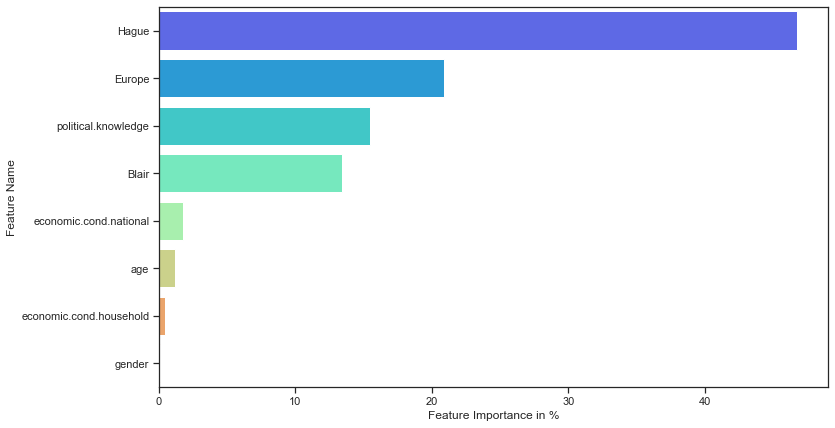

In [79]:
f=pd.DataFrame(grid_search_dt.feature_importances_*100,index=xtrain.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sn.barplot(f[0],f.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
#plt.title('Feature Importance Plot for DT', color = 'b')
plt.show()

### **Bagging on RF Classifier**

In [80]:
rfcl = RandomForestClassifier(random_state=1)
param_grid_rf = { 'max_depth': [5,10,15,20],
                     #'max_features' : [3,4,5],
                     'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split' : [30, 50, 70, 100],
                             'n_estimators': [101, 201, 301, 501]
    
}

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid=param_grid_rf, cv = 7, n_jobs=-1)
grid_search_rf.fit(xtrain, ytrain)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'n_estimators': [101, 201, 301, 501]})

In [81]:
rf_model = grid_search_rf.best_estimator_
rf_model

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=30,
                       n_estimators=101, random_state=1)

In [82]:
### Accuracy for Tuned RF Model

print('Accuracy for Tuned Trained RFModel is:', round(rf_model.score(xtrain, ytrain),3))
print('Accuracy for Tuned Test RF Model is:', round(rf_model.score(xtest, ytest),3))

Accuracy for Tuned Trained RFModel is: 0.835
Accuracy for Tuned Test RF Model is: 0.86


In [83]:
round(pd.DataFrame(rf_model.feature_importances_, index = xtrain.columns),2).T

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  0.06                    0.07                     0.04   0.19   0.34   

   Europe  political.knowledge  gender  
0    0.22                 0.08     0.0

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



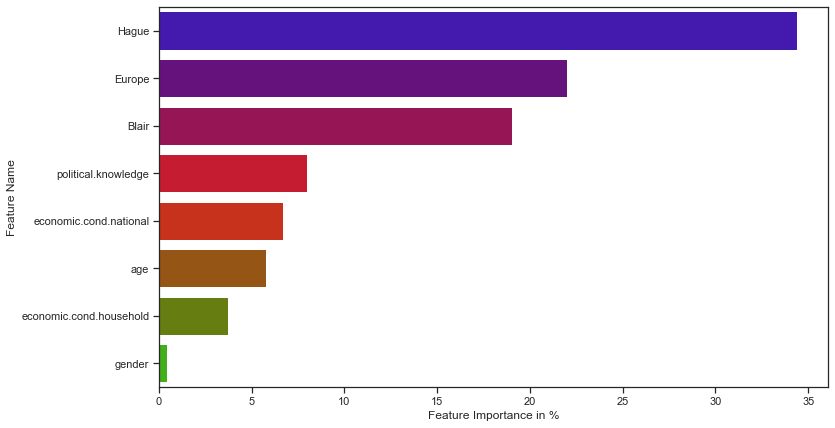

In [84]:
f=pd.DataFrame(rf_model.feature_importances_*100,index=xtrain.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sn.barplot(f[0],f.index,palette='brg')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
#plt.title('Feature Importance Plot', color = 'b')
plt.show()

In [85]:
### Bagging 

bgcl = BaggingClassifier(base_estimator = dt_model, random_state = 1, n_estimators = 201)
bgcl.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=201, random_state=1)

In [86]:
### Accuracy for Bagging Model

print('Accuracy for Tuned Trained Bagging Model is:', round(bgcl.score(xtrain, ytrain),3))
print('Accuracy for Tuned Test Bagging Model is:', round(bgcl.score(xtest, ytest),3))

Accuracy for Tuned Trained Bagging Model is: 1.0
Accuracy for Tuned Test Bagging Model is: 0.833


In [87]:
### Predictions on Bagging RF

ytrain_predict_rf = rf_model.predict(xtrain)
ytest_predict_rf = rf_model.predict(xtest)

ytrain_predictprob_rf = rf_model.predict_proba(xtrain)
ytest_predictprob_rf = rf_model.predict_proba(xtest)

### **AdaBoosting**

In [88]:
ada = AdaBoostClassifier(algorithm='SAMME.R', random_state=1)

param_grid_ada  = {
                    'algorithm' : ['SAMME.R'],
                   'n_estimators' : [51, 101],
                       'learning_rate' : [1.0, 0.001, 0.01, 0.2, 0.3]
                  }

ada_model = GridSearchCV(ada, param_grid=param_grid_ada, cv = 7, n_jobs = -1)
ada_model.fit(xtrain, ytrain)

GridSearchCV(cv=7, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [51, 101]})

In [89]:
ada_model.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 101}

In [90]:
ada_model = ada_model.best_estimator_
ada_model

AdaBoostClassifier(learning_rate=0.3, n_estimators=101, random_state=1)

In [91]:
print('Accuracy for Trained AdaBoosting Model is:', round(ada_model.score(xtrain, ytrain),2))
print('Accuracy for Test AdaBoosting Model is:', round(ada_model.score(xtest, ytest),2))

Accuracy for Trained AdaBoosting Model is: 0.84
Accuracy for Test AdaBoosting Model is: 0.84


C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



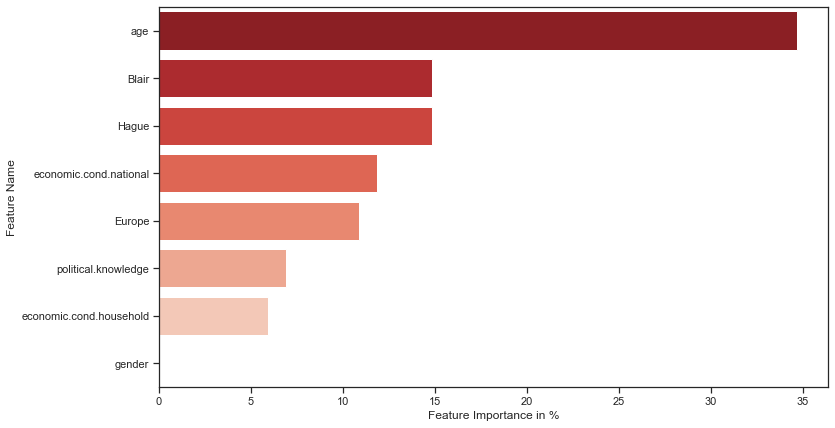

In [92]:
f=pd.DataFrame(ada_model.feature_importances_*100,index=xtrain.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sn.barplot(f[0],f.index,palette='Reds_r')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
#plt.title('Feature Importance Plot', color = 'b')
plt.show()

In [93]:
round(pd.DataFrame(ada_model.feature_importances_, index = xtrain.columns),2).T

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  0.35                    0.12                     0.06   0.15   0.15   

   Europe  political.knowledge  gender  
0    0.11                 0.07     0.0

In [94]:
### Predictions on AdaBoosting

ytrain_predict_ada = ada_model.predict(xtrain)
ytest_predict_ada = ada_model.predict(xtest)

ytrain_predictprob_ada = ada_model.predict_proba(xtrain)
ytest_predictprob_ada = ada_model.predict_proba(xtest)

### **Gradient Boosting**

In [95]:
grad = GradientBoostingClassifier(criterion = 'friedman_mse', random_state=1)

param_grid_gb = { 
                    'n_estimators' : [51, 101, 301],
                     'loss' : ['log_loss'],
                         'max_features': [5, 6, 7],
                             'min_samples_split' : [30, 40, 50]
    
                }

gradboost_model = GridSearchCV(grad, cv = 7, n_jobs = -1, param_grid = param_grid_gb)
gradboost_model.fit(xtrain, ytrain)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'loss': ['log_loss'], 'max_features': [5, 6, 7],
                         'min_samples_split': [30, 40, 50],
                         'n_estimators': [51, 101, 301]})

In [96]:
### Predictions on Gradient Boosting

ytrain_predict_grad = gradboost_model.predict(xtrain)
ytest_predict_grad = gradboost_model.predict(xtest)

ytrain_predictprob_grad = gradboost_model.predict_proba(xtrain)
ytest_predictprob_grad = gradboost_model.predict_proba(xtest)

In [97]:
gradboost_model.best_params_

{'loss': 'log_loss',
 'max_features': 5,
 'min_samples_split': 50,
 'n_estimators': 51}

In [98]:
gradboost_model = gradboost_model.best_estimator_
gradboost_model

GradientBoostingClassifier(max_features=5, min_samples_split=50,
                           n_estimators=51, random_state=1)

C:\Users\Kunal Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



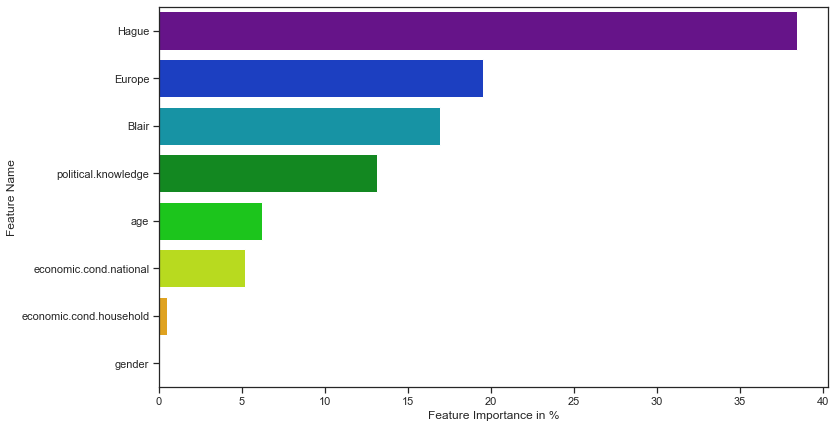

In [99]:
f=pd.DataFrame(gradboost_model.feature_importances_*100, index=xtrain.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sn.barplot(f[0],f.index,palette='nipy_spectral')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
#plt.title('Feature Importance Plot', color = 'b')
plt.show()

In [100]:
round(pd.DataFrame(gradboost_model.feature_importances_, index = xtrain.columns),2).T

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  0.06                    0.05                     0.01   0.17   0.38   

   Europe  political.knowledge  gender  
0     0.2                 0.13     0.0

In [101]:
## Accuracy for Grad Boosting

print('Accuracy for Trained AdaBoosting Model is:', round(gradboost_model.score(xtrain, ytrain),2))
print('Accuracy for Test AdaBoosting Model is:', round(gradboost_model.score(xtest, ytest),2))

Accuracy for Trained AdaBoosting Model is: 0.87
Accuracy for Test AdaBoosting Model is: 0.85


### **Tuned Logit Model**

In [102]:
logit1 = LogisticRegression(penalty='l2', random_state=1)
param_grid_logit = { 'tol': [0.0001, 0.00001, 0.001],
                       'solver': ['liblinear', 'lbfgs', 'saga'],
                    'max_iter' : [1000, 100]
                   }

logit_model = GridSearchCV(logit1, param_grid=param_grid_logit, n_jobs=-1, cv = 7)
logit_model.fit(xtrain, ytrain)

GridSearchCV(cv=7, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [1000, 100],
                         'solver': ['liblinear', 'lbfgs', 'saga'],
                         'tol': [0.0001, 1e-05, 0.001]})

In [103]:
logit_model = logit_model.best_estimator_
logit_model

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [104]:
### Accuracy for Tuned Logit Model

print('Accuracy for Tuned Trained Logit Model is:', round(logit_model.score(xtrain, ytrain),2))
print('Accuracy for Tuned Test Logit Model is:', round(logit_model.score(xtest, ytest),2))

Accuracy for Tuned Trained Logit Model is: 0.83
Accuracy for Tuned Test Logit Model is: 0.86


In [105]:
## Intercept

intercept = logit_model.intercept_
print('Intercept for Logit Model is: {}'.format(intercept))

Intercept for Logit Model is: [1.30480547]


Feature: 0, Score: -0.21
Feature: 1, Score: 0.31
Feature: 2, Score: 0.03
Feature: 3, Score: 0.64
Feature: 4, Score: -1.05
Feature: 5, Score: -0.68
Feature: 6, Score: -0.43
Feature: 7, Score: 0.02


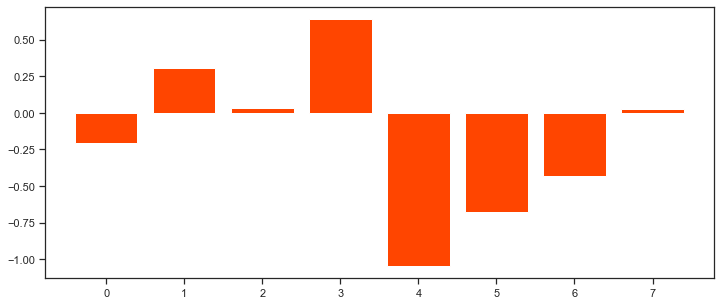

In [106]:
## Feature Importance

importance = logit_model.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' %(i,v))
    
plt.figure(figsize = (12,5))
plt.bar([x for x in range(len(importance))], importance, color = 'orangered')
plt.show()

In [107]:
logit_model.feature_names_in_

array(['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype=object)

In [108]:
### Predictions on Logit

ytrain_predict_logit = logit_model.predict(xtrain)
ytest_predict_logit = logit_model.predict(xtest)

ytrain_predictprob_logit = logit_model.predict_proba(xtrain)
ytest_predictprob_logit = logit_model.predict_proba(xtest)

In [109]:
logit_model.feature_names_in_

array(['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype=object)

### **Tuned LDA Model**

In [110]:
## LDA

lda1 = LinearDiscriminantAnalysis()

param_grid_lda = { 'solver': ['svd', 'eigen'],
                     'tol': [0.001, 0.0001, 0.00001]
                 }

lda_model = GridSearchCV(lda1, param_grid=param_grid_lda, cv = 7, n_jobs=-1)
lda_model.fit(xtrain, ytrain)

GridSearchCV(cv=7, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [111]:
lda_model = lda_model.best_estimator_

In [112]:
## Intercept

intercept = lda_model.intercept_
print('Intercept for LDA Model is: {}'.format(intercept))

Intercept for LDA Model is: [1.38940367]


Feature: 0, Score: -0.27
Feature: 1, Score: 0.32
Feature: 2, Score: 0.03
Feature: 3, Score: 0.81
Feature: 4, Score: -1.20
Feature: 5, Score: -0.73
Feature: 6, Score: -0.52
Feature: 7, Score: 0.01


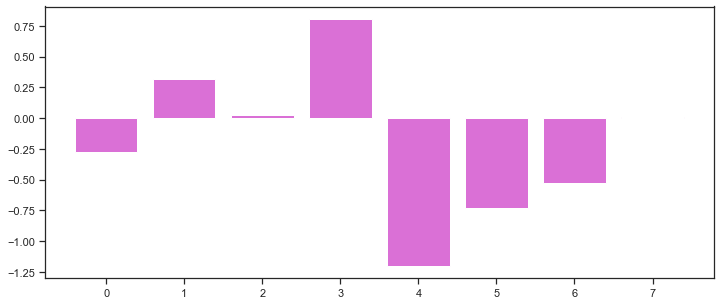

In [113]:
## Feature Importance

importance = lda_model.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' %(i,v))
    
plt.figure(figsize = (12,5))
plt.bar([x for x in range(len(importance))], importance, color = 'orchid')
plt.show()

In [114]:
logit_model.feature_names_in_

array(['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype=object)

In [115]:
### Accuracy for LDA Model

print('Accuracy for Tuned Trained LDA Model is:', round(lda_model.score(xtrain, ytrain),2))
print('Accuracy for Tuned Test LDA Model is:', round(lda_model.score(xtest, ytest),2))

Accuracy for Tuned Trained LDA Model is: 0.82
Accuracy for Tuned Test LDA Model is: 0.85


In [116]:
### Predictions on LDA

ytrain_predict_lda = lda_model.predict(xtrain)
ytest_predict_lda = lda_model.predict(xtest)

ytrain_predictprob_lda = lda_model.predict_proba(xtrain)
ytest_predictprob_lda = lda_model.predict_proba(xtest)

### **Tuned KNN Model**

In [117]:
param_grid_knn = {
                    'n_neighbors' : [5, 15, 17],
                    'weights': ['uniform', 'distance'],
                    'metric' : ['euclidean', 'minkowski', 'manhattan']
}

knn_model1 = GridSearchCV(knn_model, param_grid=param_grid_knn, cv = 7, n_jobs=-1)
knn_model1.fit(xtrain, ytrain)

GridSearchCV(cv=7,
             estimator=KNeighborsClassifier(metric='euclidean', n_jobs=1,
                                            n_neighbors=17,
                                            weights='distance'),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': [5, 15, 17],
                         'weights': ['uniform', 'distance']})

In [118]:
knn_model = knn_model1.best_estimator_
knn_model

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=17,
                     weights='distance')

In [119]:
### Accuracy for KNN Model

print('Accuracy for Tuned Trained KNN Model is:', round(knn_model.score(xtrain, ytrain),2))
print('Accuracy for Tuned Test KNN Model is:', round(knn_model.score(xtest, ytest),2))

Accuracy for Tuned Trained KNN Model is: 1.0
Accuracy for Tuned Test KNN Model is: 0.86


### **1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.**

In [120]:
print('\033[1m' + 'CL Report for Trained DT Model:' + '\033[0m','\n')
print(metrics.classification_report(ytrain, ytrain_predict_dt), '\n', '\n')

print('\033[1m' + 'CL Report for Test DT Model:' + '\033[0m','\n')
print(metrics.classification_report(ytest, ytest_predict_dt))

CL Report for Trained DT Model: 

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       322
           1       0.86      0.89      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 
 

CL Report for Test DT Model: 

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       138
           1       0.87      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



In [121]:
print('\033[1m' + 'CL Report for Trained RF Model:' + '\033[0m','\n')
print(metrics.classification_report(ytrain, ytrain_predict_rf), '\n', '\n')

print('\033[1m' + 'CL Report for Test RF Model:' + '\033[0m','\n')
print(metrics.classification_report(ytest, ytest_predict_rf))

CL Report for Trained RF Model: 

              precision    recall  f1-score   support

           0       0.79      0.62      0.69       322
           1       0.85      0.93      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 
 

CL Report for Test RF Model: 

              precision    recall  f1-score   support

           0       0.86      0.64      0.73       138
           1       0.86      0.96      0.90       318

    accuracy                           0.86       456
   macro avg       0.86      0.80      0.82       456
weighted avg       0.86      0.86      0.85       456



In [122]:
print('\033[1m' + 'CL Report for Trained Logit Model:' + '\033[0m','\n')
print(metrics.classification_report(ytrain, ytrain_predict_logit), '\n', '\n')

print('\033[1m' + 'CL Report for Test Logit Model:' + '\033[0m','\n')
print(metrics.classification_report(ytest, ytest_predict_logit))

CL Report for Trained Logit Model: 

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 
 

CL Report for Test Logit Model: 

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



In [123]:
print('\033[1m' + 'CL Report for Trained LDA Model:' + '\033[0m','\n')
print(metrics.classification_report(ytrain, ytrain_predict_lda), '\n', '\n')

print('\033[1m' + 'CL Report for Test LDA Model:' + '\033[0m','\n')
print(metrics.classification_report(ytest, ytest_predict_lda))

CL Report for Trained LDA Model: 

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 
 

CL Report for Test LDA Model: 

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



In [124]:
print('\033[1m' + 'CL Report for Trained AdaBoosting Model:' + '\033[0m','\n')
print(metrics.classification_report(ytrain, ytrain_predict_ada), '\n', '\n')

print('\033[1m' + 'CL Report for Test AdaBoosting Model:' + '\033[0m','\n')
print(metrics.classification_report(ytest, ytest_predict_ada))

CL Report for Trained AdaBoosting Model: 

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       322
           1       0.87      0.90      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 
 

CL Report for Test AdaBoosting Model: 

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       138
           1       0.87      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



In [125]:
print('\033[1m' + 'CL Report for Trained GradBoosting Model:' + '\033[0m','\n')
print(metrics.classification_report(ytrain, ytrain_predict_grad), '\n', '\n')

print('\033[1m' + 'CL Report for Test GradBoosting Model:' + '\033[0m','\n')
print(metrics.classification_report(ytest, ytest_predict_grad))

CL Report for Trained GradBoosting Model: 

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       322
           1       0.89      0.92      0.91       739

    accuracy                           0.87      1061
   macro avg       0.85      0.84      0.84      1061
weighted avg       0.87      0.87      0.87      1061
 
 

CL Report for Test GradBoosting Model: 

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.88      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



In [126]:
print('\033[1m' + 'CL Report for Trained Gaussian Model:' + '\033[0m','\n')
print(metrics.classification_report(ytrain, ytrain_predict_gb), '\n', '\n')

print('\033[1m' + 'CL Report for Test Gaussian Model:' + '\033[0m','\n')
print(metrics.classification_report(ytest, ytest_predict_gb))

CL Report for Trained Gaussian Model: 

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 
 

CL Report for Test Gaussian Model: 

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



In [127]:
print('\033[1m' + 'CL Report for Trained KNN Model:' + '\033[0m','\n')
print(metrics.classification_report(ytrain, ytrain_predict_knn), '\n', '\n')

print('\033[1m' + 'CL Report for Test KNN Model:' + '\033[0m','\n')
print(metrics.classification_report(ytest, ytest_predict_knn))

CL Report for Trained KNN Model: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 
 

CL Report for Test KNN Model: 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       138
           1       0.89      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.84       456
weighted avg       0.86      0.86      0.86       456



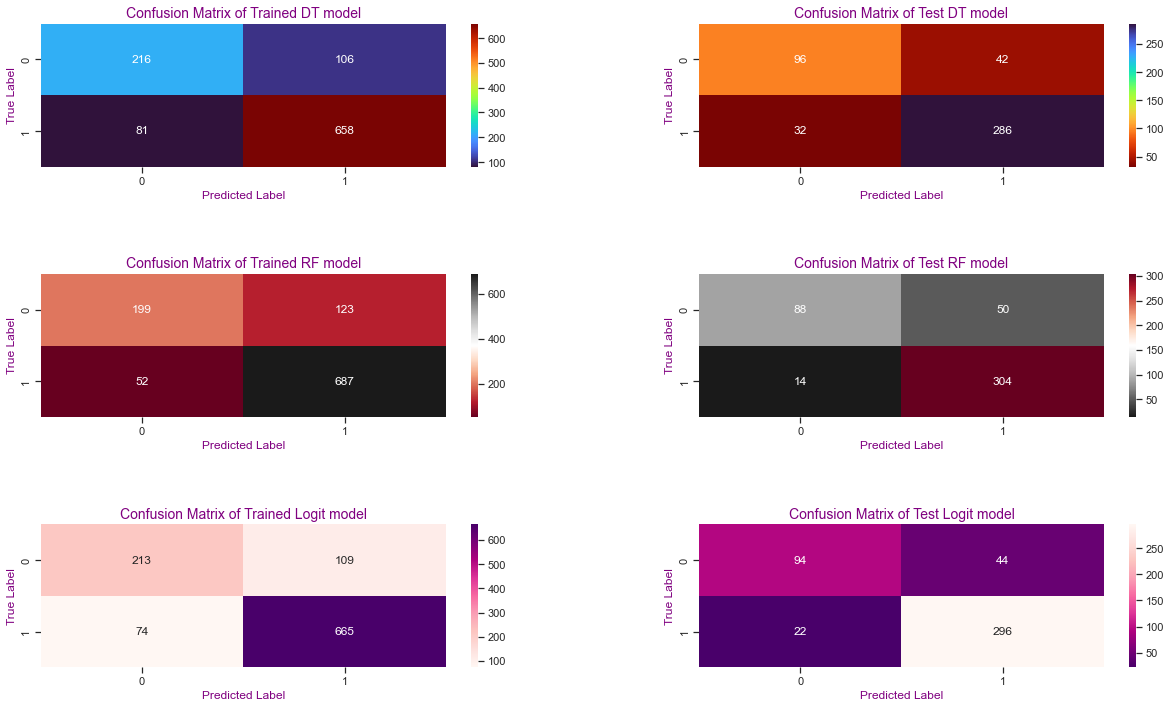

In [128]:
## CL report and Confusion Matrix

plt.figure(figsize=(17,10))
plt.subplot(321)
sn.heatmap(metrics.confusion_matrix(ytrain, ytrain_predict_dt), annot = True, fmt = 'd', cmap = 'turbo')
plt.title('Confusion Matrix of Trained DT model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(322)
sn.heatmap(metrics.confusion_matrix(ytest, ytest_predict_dt), annot = True, fmt = 'd', cmap = 'turbo_r')
plt.title('Confusion Matrix of Test DT model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')


plt.subplot(323)
sn.heatmap(metrics.confusion_matrix(ytrain, ytrain_predict_rf), annot = True, fmt = 'd', cmap = 'RdGy')
plt.title('Confusion Matrix of Trained RF model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(324)
sn.heatmap(metrics.confusion_matrix(ytest, ytest_predict_rf), annot = True, fmt = 'd', cmap = 'RdGy_r')
plt.title('Confusion Matrix of Test RF model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(325)
sn.heatmap(metrics.confusion_matrix(ytrain, ytrain_predict_logit), annot = True, fmt = 'd', cmap = 'RdPu')
plt.title('Confusion Matrix of Trained Logit model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(326)
sn.heatmap(metrics.confusion_matrix(ytest, ytest_predict_logit), annot = True, fmt = 'd', cmap = 'RdPu_r')
plt.title('Confusion Matrix of Test Logit model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.tight_layout()
plt.subplots_adjust(hspace=0.75, wspace=0.3)
plt.show()

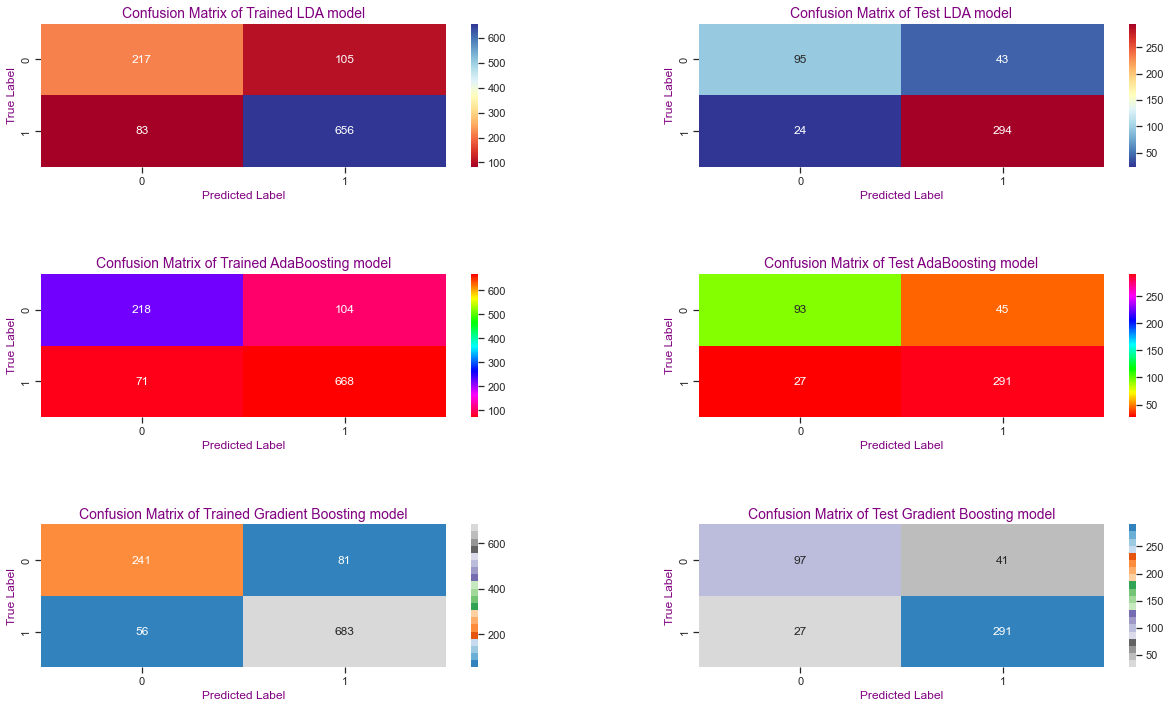

In [129]:
## CL report and Confusion Matrix

plt.figure(figsize=(17,10))
plt.subplot(321)
sn.heatmap(metrics.confusion_matrix(ytrain, ytrain_predict_lda), annot = True, fmt = 'd', cmap = 'RdYlBu')
plt.title('Confusion Matrix of Trained LDA model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(322)
sn.heatmap(metrics.confusion_matrix(ytest, ytest_predict_lda), annot = True, fmt = 'd', cmap = 'RdYlBu_r')
plt.title('Confusion Matrix of Test LDA model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')


plt.subplot(323)
sn.heatmap(metrics.confusion_matrix(ytrain, ytrain_predict_ada), annot = True, fmt = 'd', cmap = 'hsv_r')
plt.title('Confusion Matrix of Trained AdaBoosting model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(324)
sn.heatmap(metrics.confusion_matrix(ytest, ytest_predict_ada), annot = True, fmt = 'd', cmap = 'hsv')
plt.title('Confusion Matrix of Test AdaBoosting model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(325)
sn.heatmap(metrics.confusion_matrix(ytrain, ytrain_predict_grad), annot = True, fmt = 'd', cmap = 'tab20c')
plt.title('Confusion Matrix of Trained Gradient Boosting model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(326)
sn.heatmap(metrics.confusion_matrix(ytest, ytest_predict_grad), annot = True, fmt = 'd', cmap = 'tab20c_r')
plt.title('Confusion Matrix of Test Gradient Boosting model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.tight_layout()
plt.subplots_adjust(hspace=0.75, wspace=0.3)
plt.show()

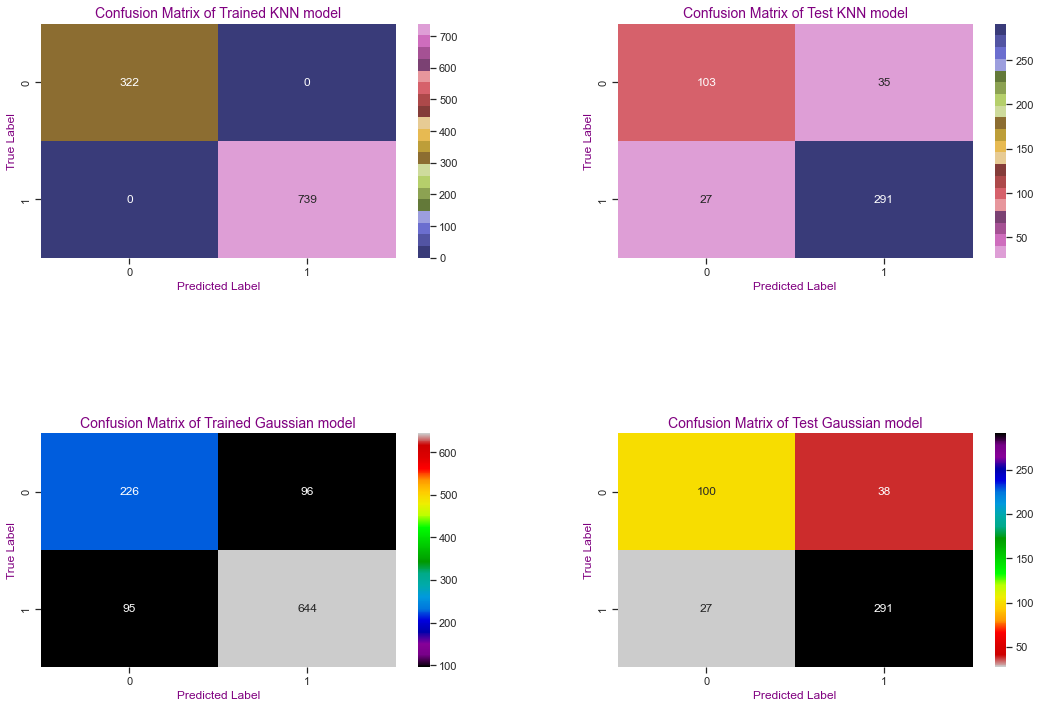

In [130]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sn.heatmap(metrics.confusion_matrix(ytrain, ytrain_predict_knn), annot = True, fmt = 'd', cmap = 'tab20b')
plt.title('Confusion Matrix of Trained KNN model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(222)
sn.heatmap(metrics.confusion_matrix(ytest, ytest_predict_knn), annot = True, fmt = 'd', cmap = 'tab20b_r')
plt.title('Confusion Matrix of Test KNN model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(223)
sn.heatmap(metrics.confusion_matrix(ytrain, ytrain_predict_gb), annot = True, fmt = 'd', cmap = 'nipy_spectral')
plt.title('Confusion Matrix of Trained Gaussian model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.subplot(224)
sn.heatmap(metrics.confusion_matrix(ytest, ytest_predict_gb), annot = True, fmt = 'd', cmap = 'nipy_spectral_r')
plt.title('Confusion Matrix of Test Gaussian model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')

plt.tight_layout()
plt.subplots_adjust(hspace=0.75, wspace=0.3)
plt.show()

Area under the curve for Trained DT Model is 88.92 %
Area under the curve for Trained RF Model is 90.5 %
Area under the curve for Trained Logistic Model is 87.71 %
Area under the curve for Trained LDA Model is 87.69 %
Area under the curve for Trained Gaussian Model is 87.32 %
Area under the curve for Trained KNN Model is 100.0 %
Area under the curve for Trained AdaBoosting Model is 89.83 %
Area under the curve for Trained GradientBoosting Model is 92.71 %


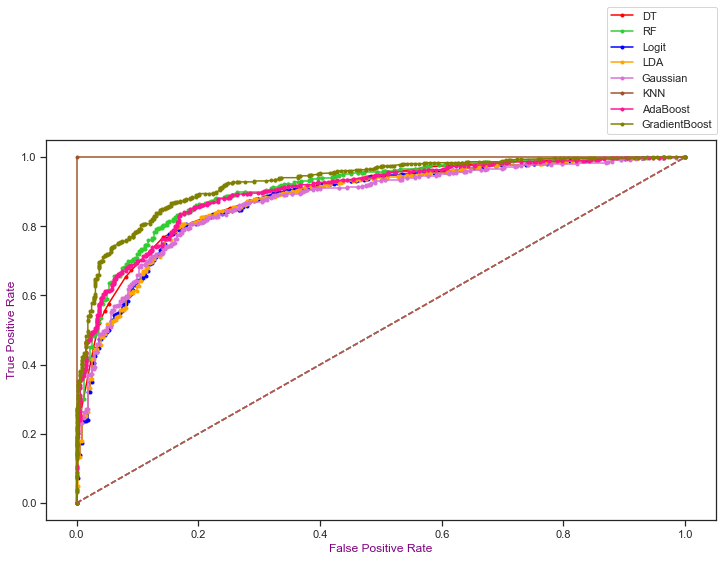

In [131]:
## Training

prob_dt = ytrain_predictprob_dt[:,1]
prob_rf = ytrain_predictprob_rf[:,1]
prob_logit = ytrain_predictprob_logit[:,1]
prob_lda = ytrain_predictprob_lda[:,1]
prob_gb = ytrain_predictprob_gb[:,1]
prob_knn = ytrain_predictprob_knn[:,1]
prob_ada = ytrain_predictprob_ada[:,1]
prob_grad = ytrain_predictprob_grad[:,1]


print('Area under the curve for Trained DT Model is',round(roc_auc_score(ytrain, prob_dt)*100,2),'%')
print('Area under the curve for Trained RF Model is',round(roc_auc_score(ytrain, prob_rf)*100,2),'%')
plt.figure(figsize=(12,7))
fpr_dt, tpr_dt, thresholds = roc_curve(ytrain, prob_dt)
fpr_rf, tpr_rf, thresholds = roc_curve(ytrain, prob_rf)
plt.plot(fpr_dt, tpr_dt, marker='.', label = 'DT', color = 'red')
plt.plot(fpr_rf, tpr_rf, marker='.', label = 'RF', color = 'limegreen')

plt.plot([0, 1], [0, 1], linestyle='--')


#plt.subplot(122)
#plt.figure(figsize=(12,7))
print('Area under the curve for Trained Logistic Model is',round(roc_auc_score(ytrain, prob_logit)*100,2),'%')
print('Area under the curve for Trained LDA Model is',round(roc_auc_score(ytrain, prob_lda)*100,2),'%')
fpr_logit, tpr_logit, thresholds = roc_curve(ytrain, prob_logit)
fpr_lda, tpr_lda, thresholds = roc_curve(ytrain, prob_lda)
plt.plot(fpr_logit, tpr_logit, marker='.', label = 'Logit', color = 'blue')
plt.plot(fpr_lda, tpr_lda, marker='.', label = 'LDA', color = 'orange')

plt.plot([0, 1], [0, 1], linestyle='--')

##
print('Area under the curve for Trained Gaussian Model is',round(roc_auc_score(ytrain, prob_gb)*100,2),'%')
print('Area under the curve for Trained KNN Model is',round(roc_auc_score(ytrain, prob_knn)*100,2),'%')
fpr_gb, tpr_gb, thresholds = roc_curve(ytrain, prob_gb)
fpr_knn, tpr_knn, thresholds = roc_curve(ytrain, prob_knn)
plt.plot(fpr_gb, tpr_gb, marker='.', label = 'Gaussian', color = 'orchid')
plt.plot(fpr_knn, tpr_knn, marker='.', label = 'KNN', color = 'sienna')

plt.plot([0, 1], [0, 1], linestyle='--')


#
print('Area under the curve for Trained AdaBoosting Model is',round(roc_auc_score(ytrain, prob_ada)*100,2),'%')
print('Area under the curve for Trained GradientBoosting Model is',round(roc_auc_score(ytrain, prob_grad)*100,2),'%')

fpr_ada, tpr_ada, thresholds = roc_curve(ytrain, prob_ada)
fpr_grad, tpr_grad, thresholds = roc_curve(ytrain, prob_grad)
plt.plot(fpr_ada, tpr_ada, marker='.', label = 'AdaBoost', color = 'deeppink')
plt.plot(fpr_grad, tpr_grad, marker='.', label = 'GradientBoost', color = 'olive')

plt.plot([0, 1], [0, 1], linestyle='--')

#plt.title('Visual Model performance for Trained Data', color = 'purple', pad = 14, fontsize = 14)
plt.xlabel('False Positive Rate', color = 'purple')
plt.ylabel('True Positive Rate', color = 'purple')
plt.legend(bbox_to_anchor = (.01, 1.0, 1, .10), loc = 'lower right')
plt.show()


Area under the curve for Test DT Model is 89.71 %
Area under the curve for Test RF Model is 92.04 %
Area under the curve for Test Logistic Model is 91.29 %
Area under the curve for Test LDA Model is 91.44 %
Area under the curve for Test Gaussian Model is 91.25 %
Area under the curve for Test KNN Model is 89.7 %
Area under the curve for Test AdaBoosting Model is 91.27 %
Area under the curve for Test GradientBoosting Model is 91.52 %


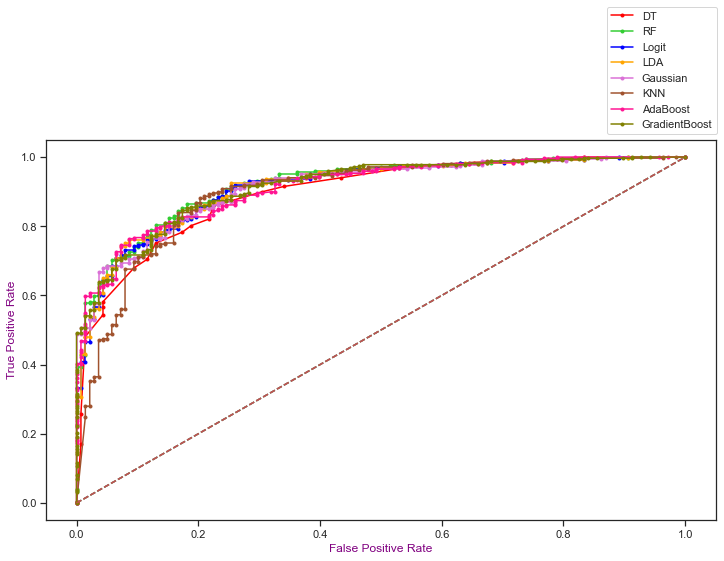

In [132]:
## Testing

prob_dt_test = ytest_predictprob_dt[:,1]
prob_rf_test = ytest_predictprob_rf[:,1]
prob_logit_test = ytest_predictprob_logit[:,1]
prob_lda_test = ytest_predictprob_lda[:,1]
prob_gb_test = ytest_predictprob_gb[:,1]
prob_knn_test = ytest_predictprob_knn[:,1]
prob_ada_test = ytest_predictprob_ada[:,1]
prob_grad_test = ytest_predictprob_grad[:,1]


print('Area under the curve for Test DT Model is',round(roc_auc_score(ytest, prob_dt_test)*100,2),'%')
print('Area under the curve for Test RF Model is',round(roc_auc_score(ytest, prob_rf_test)*100,2),'%')
plt.figure(figsize=(12,7))
fpr_test_dt, tpr_test_dt, thresholds = roc_curve(ytest, prob_dt_test)
fpr_test_rf, tpr_test_rf, thresholds = roc_curve(ytest, prob_rf_test)
plt.plot(fpr_test_dt, tpr_test_dt, marker='.', label = 'DT', color = 'red')
plt.plot(fpr_test_rf, tpr_test_rf, marker='.', label = 'RF', color = 'limegreen')

plt.plot([0, 1], [0, 1], linestyle='--')


#plt.subplot(122)
#plt.figure(figsize=(12,7))
print('Area under the curve for Test Logistic Model is',round(roc_auc_score(ytest, prob_logit_test)*100,2),'%')
print('Area under the curve for Test LDA Model is',round(roc_auc_score(ytest, prob_lda_test)*100,2),'%')
fpr_test_logit, tpr_test_logit, thresholds = roc_curve(ytest, prob_logit_test)
fpr_test_lda, tpr_test_lda, thresholds = roc_curve(ytest, prob_lda_test)
plt.plot(fpr_test_logit, tpr_test_logit, marker='.', label = 'Logit', color = 'blue')
plt.plot(fpr_test_lda, tpr_test_lda, marker='.', label = 'LDA', color = 'orange')

plt.plot([0, 1], [0, 1], linestyle='--')

##
print('Area under the curve for Test Gaussian Model is',round(roc_auc_score(ytest, prob_gb_test)*100,2),'%')
print('Area under the curve for Test KNN Model is',round(roc_auc_score(ytest, prob_knn_test)*100,2),'%')
fpr_test_gb, tpr_test_gb, thresholds = roc_curve(ytest, prob_gb_test)
fpr_test_knn, tpr_test_knn, thresholds = roc_curve(ytest, prob_knn_test)
plt.plot(fpr_test_gb, tpr_test_gb, marker='.', label = 'Gaussian', color = 'orchid')
plt.plot(fpr_test_knn, tpr_test_knn, marker='.', label = 'KNN', color = 'sienna')

plt.plot([0, 1], [0, 1], linestyle='--')


#
print('Area under the curve for Test AdaBoosting Model is',round(roc_auc_score(ytest, prob_ada_test)*100,2),'%')
print('Area under the curve for Test GradientBoosting Model is',round(roc_auc_score(ytest, prob_grad_test)*100,2),'%')

fpr_test_ada, tpr_test_ada, thresholds = roc_curve(ytest, prob_ada_test)
fpr_test_grad, tpr_test_grad, thresholds = roc_curve(ytest, prob_grad_test)
plt.plot(fpr_test_ada, tpr_test_ada, marker='.', label = 'AdaBoost', color = 'deeppink')
plt.plot(fpr_test_grad, tpr_test_grad, marker='.', label = 'GradientBoost', color = 'olive')

plt.plot([0, 1], [0, 1], linestyle='--')

#plt.title('Visual Model performance for Test Data', color = 'purple', pad = 14, fontsize = 14)
plt.xlabel('False Positive Rate', color = 'purple')
plt.ylabel('True Positive Rate', color = 'purple')
plt.legend(bbox_to_anchor = (.01, 1.0, 1, .10), loc = 'lower right')
plt.show()


### **Model Comparison**

In [133]:
dt_train_metrics = metrics.classification_report(ytrain, ytrain_predict_dt, output_dict=True)
dt = pd.DataFrame(dt_train_metrics).transpose()
dt_train_precision = round(dt.loc['1'][0],2)
dt_train_recall = round(dt.loc['1'][1],2)
dt_train_f1 = round(dt.loc['1'][2],2)


dt_test_metrics = metrics.classification_report(ytest, ytest_predict_dt, output_dict=True)
dt1 = pd.DataFrame(dt_test_metrics).transpose()
dt_test_precision = round(dt1.loc['1'][0],2)
dt_test_recall = round(dt1.loc['1'][1],2)
dt_test_f1 = round(dt1.loc['1'][2],2)

In [134]:
rf_train_metrics = metrics.classification_report(ytrain, ytrain_predict_rf, output_dict=True)
rf = pd.DataFrame(rf_train_metrics).transpose()
rf_train_precision = round(rf.loc['1'][0],2)
rf_train_recall = round(rf.loc['1'][1],2)
rf_train_f1 = round(rf.loc['1'][2],2)


rf_test_metrics = metrics.classification_report(ytest, ytest_predict_rf, output_dict=True)
rf1 = pd.DataFrame(rf_test_metrics).transpose()
rf_test_precision = round(rf1.loc['1'][0],2)
rf_test_recall = round(rf1.loc['1'][1],2)
rf_test_f1 = round(rf1.loc['1'][2],2)

In [135]:
lda_train_metrics = metrics.classification_report(ytrain, ytrain_predict_lda, output_dict=True)
la = pd.DataFrame(lda_train_metrics).transpose()
lda_train_precision = round(la.loc['1'][0],2)
lda_train_recall = round(la.loc['1'][1],2)
lda_train_f1 = round(la.loc['1'][2],2)

lda_test_metrics = metrics.classification_report(ytest, ytest_predict_lda, output_dict=True)
la1 = pd.DataFrame(lda_test_metrics).transpose()
lda_test_precision = round(la1.loc['1'][0],2)
lda_test_recall = round(la1.loc['1'][1],2)
lda_test_f1 = round(la1.loc['1'][2],2)

In [136]:
logit_train_metrics = metrics.classification_report(ytrain, ytrain_predict_logit, output_dict=True)
lt = pd.DataFrame(logit_train_metrics).transpose()
logit_train_precision = round(lt.loc['1'][0],2)
logit_train_recall = round(lt.loc['1'][1],2)
logit_train_f1 = round(lt.loc['1'][2],2)


logit_test_metrics = metrics.classification_report(ytest, ytest_predict_lda, output_dict=True)
lt1 = pd.DataFrame(logit_test_metrics).transpose()
logit_test_precision = round(lt1.loc['1'][0],2)
logit_test_recall = round(lt1.loc['1'][1],2)
logit_test_f1 = round(lt1.loc['1'][2],2)

In [137]:
knn_train_metrics = metrics.classification_report(ytrain, ytrain_predict_knn, output_dict=True)
knn_metric = pd.DataFrame(knn_train_metrics).transpose()
knn_train_precision = round(knn_metric.loc['1'][0],2)
knn_train_recall = round(knn_metric.loc['1'][1],2)
knn_train_f1 = round(knn_metric.loc['1'][2],2)


knn_test_metrics = metrics.classification_report(ytest, ytest_predict_knn, output_dict=True)
knn_metric1 = pd.DataFrame(knn_test_metrics).transpose()
knn_test_precision = round(knn_metric1.loc['1'][0],2)
knn_test_recall = round(knn_metric1.loc['1'][1],2)
knn_test_f1 = round(knn_metric1.loc['1'][2],2)

In [138]:
gb_train_metrics = metrics.classification_report(ytrain, ytrain_predict_gb, output_dict=True)
gb = pd.DataFrame(gb_train_metrics).transpose()
gb_train_precision = round(gb.loc['1'][0],2)
gb_train_recall = round(gb.loc['1'][1],2)
gb_train_f1 = round(gb.loc['1'][2],2)


gb_test_metrics = metrics.classification_report(ytest, ytest_predict_gb, output_dict=True)
gb1 = pd.DataFrame(gb_test_metrics).transpose()
gb_test_precision = round(gb1.loc['1'][0],2)
gb_test_recall = round(gb1.loc['1'][1],2)
gb_test_f1 = round(gb1.loc['1'][2],2)

In [139]:
grad_train_metrics = metrics.classification_report(ytrain, ytrain_predict_grad, output_dict=True)
grad = pd.DataFrame(grad_train_metrics).transpose()
grad_train_precision = round(grad.loc['1'][0],2)
grad_train_recall = round(grad.loc['1'][1],2)
grad_train_f1 = round(grad.loc['1'][2],2)


grad_test_metrics = metrics.classification_report(ytest, ytest_predict_grad, output_dict=True)
grad1 = pd.DataFrame(grad_test_metrics).transpose()
grad_test_precision = round(grad1.loc['1'][0],2)
grad_test_recall = round(grad1.loc['1'][1],2)
grad_test_f1 = round(grad1.loc['1'][2],2)

In [140]:
ada_train_metrics = metrics.classification_report(ytrain, ytrain_predict_ada, output_dict=True)
ada = pd.DataFrame(ada_train_metrics).transpose()
ada_train_precision = round(ada.loc['1'][0],2)
ada_train_recall = round(ada.loc['1'][1],2)
ada_train_f1 = round(ada.loc['1'][2],2)


ada_test_metrics = metrics.classification_report(ytest, ytest_predict_ada, output_dict=True)
ada1 = pd.DataFrame(ada_test_metrics).transpose()
ada_test_precision = round(ada1.loc['1'][0],2)
ada_test_recall = round(ada1.loc['1'][1],2)
ada_test_f1 = round(ada1.loc['1'][2],2)

In [141]:
index = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score']

compare_data = pd.DataFrame(
    {
    'CART Train' : [round(metrics.accuracy_score(ytrain, ytrain_predict_dt),2), round(roc_auc_score(ytrain, prob_dt),2), dt_train_recall, dt_train_precision, dt_train_f1],
    'CART Test' : [round(metrics.accuracy_score(ytest, ytest_predict_dt),2), round(roc_auc_score(ytest,prob_dt_test),2), dt_test_recall, dt_test_precision, dt_test_f1],
                    
    'RF Train' : [round(metrics.accuracy_score(ytrain, ytrain_predict_rf),2), round(roc_auc_score(ytrain, prob_rf),2), rf_train_recall, rf_train_precision, rf_train_f1],
    'RF Test' : [round(metrics.accuracy_score(ytest, ytest_predict_rf),2), round(roc_auc_score(ytest, prob_rf_test),2), rf_test_recall, rf_test_precision, rf_test_f1],
    
    'LOGIT Train' : [round(metrics.accuracy_score(ytrain, ytrain_predict_logit),2), round(roc_auc_score(ytrain, prob_logit),2), logit_train_recall, logit_train_precision, logit_train_f1],
    'LOGIT Test' : [round(metrics.accuracy_score(ytest, ytest_predict_logit),2), round(roc_auc_score(ytest, prob_logit_test),2), logit_test_recall, logit_test_precision, logit_test_f1],
                    
                      
    'LDA Train' : [round(metrics.accuracy_score(ytrain, ytrain_predict_lda),2), round(roc_auc_score(ytrain, prob_lda),2), lda_train_recall, lda_train_precision, lda_train_f1],
    'LDA Test' : [round(metrics.accuracy_score(ytest, ytest_predict_lda),2), round(roc_auc_score(ytest, prob_lda_test),2), lda_test_recall, lda_test_precision, lda_test_f1],
   
    'KNN Train' : [round(metrics.accuracy_score(ytrain, ytrain_predict_knn),2), round(roc_auc_score(ytrain, prob_knn),2), knn_train_recall, knn_train_precision, knn_train_f1],
    'KNN Test' : [round(metrics.accuracy_score(ytest, ytest_predict_knn),2), round(roc_auc_score(ytest, prob_knn_test),2), knn_test_recall, knn_test_precision, knn_test_f1],

    'Naive Bayes Train' : [round(metrics.accuracy_score(ytrain, ytrain_predict_gb),2), round(roc_auc_score(ytrain, prob_gb),2), gb_train_recall, gb_train_precision, gb_train_f1],
    'Naive Bayes Test' : [round(metrics.accuracy_score(ytest, ytest_predict_gb),2), round(roc_auc_score(ytest, prob_gb_test),2), gb_test_recall, gb_test_precision, gb_test_f1],

    'AdaBoost Train' : [round(metrics.accuracy_score(ytrain, ytrain_predict_ada),2), round(roc_auc_score(ytrain, prob_ada),2), ada_train_recall, ada_train_precision, ada_train_f1],
    'AdaBoost Test' : [round(metrics.accuracy_score(ytest, ytest_predict_ada),2), round(roc_auc_score(ytest, prob_ada_test),2), ada_test_recall, ada_test_precision, ada_test_f1],

    'GradientBoost Train' : [round(metrics.accuracy_score(ytrain, ytrain_predict_grad),2), round(roc_auc_score(ytrain, prob_grad),2), grad_train_recall, grad_train_precision, grad_train_f1],
    'GradientBoost Test' : [round(metrics.accuracy_score(ytest, ytest_predict_grad),2), round(roc_auc_score(ytest, prob_grad_test),2), grad_test_recall, grad_test_precision, grad_test_f1],

    }, 
                   
    index = index)

In [142]:
compare_data

CART Train  CART Test  RF Train  RF Test  LOGIT Train  LOGIT Test  \
Accuracy         0.82       0.84      0.84     0.86         0.83        0.86   
AUC              0.89       0.90      0.91     0.92         0.88        0.91   
Recall           0.89       0.90      0.93     0.96         0.90        0.92   
Precision        0.86       0.87      0.85     0.86         0.86        0.87   
F1 Score         0.88       0.89      0.89     0.90         0.88        0.90   

           LDA Train  LDA Test  KNN Train  KNN Test  Naive Bayes Train  \
Accuracy        0.82      0.85        1.0      0.86               0.82   
AUC             0.88      0.91        1.0      0.90               0.87   
Recall          0.89      0.92        1.0      0.92               0.87   
Precision       0.86      0.87        1.0      0.89               0.87   
F1 Score        0.87      0.90        1.0      0.90               0.87   

           Naive Bayes Test  AdaBoost Train  AdaBoost Test  \
Accuracy               0.86            0.84           0.84   
AUC                    0.91            0.90           0.91   
Recall                 0.92            0.90           0.92   
Precision              0.88            0.87           0.87   
F1 Score               0.90            0.88           0.89   

           GradientBoost Train  GradientBoost Test  
Accuracy                  0.87                0.85  
AUC                       0.93                0.92  
Recall                    0.92                0.92  
Precision                 0.89                0.88  
F1 Score                  0.91                0.90

### **1.8 Based on these predictions, what are the insights?**

* Data seems to be quite balanced with 30.3% of voters belonging to Conservating party and rest 69.7% to Labour however more data can be collected to generate stronger predictive powers.
* Hague, Europe and Blair seems to be good predictor for voter parties however Gender doen't happen to be an influencing factor.
* Voters with less Euroseptic sentiments, seems to have increased as supporters of Labour party.
* Voters between the age of 30 to 70 has given more votes comparatively and those in the 20's, 80's and 90's has voted significantly less.
* Using RF Classifier model, there are 86% chances of Labour Party being elected as party's choice with 96% probability of voters who are correctly classified of voting Labour party.
* Exit polls can be further created using the ML models along with seats covered by a party.

### Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

* President Franklin D. Roosevelt in 1941
* President John F. Kennedy in 1961
* President Richard Nixon in 1973

In [144]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('inaugural')
from nltk.corpus import inaugural
#inaugural.fileids()

import string, re, json

from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Kunal
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kunal
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to C:\Users\Kunal
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [145]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [146]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [147]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [148]:
## Number of characters

print('\033[1m' + 'Characters:' + '\033[0m','\n')
print('Number of Characters in Kennedy speech are {}'.format(len(inaugural.raw('1961-Kennedy.txt'))))
print('Number of Characters in Roosevelt speech are {}'.format(len(inaugural.raw('1941-Roosevelt.txt'))))
print('Number of Characters in Nixon speech are {}'.format(len(inaugural.raw('1973-Nixon.txt'))))


print('\n')
## Number of words

print('\033[1m' + 'Words:' + '\033[0m','\n')
print('Number of Words in Kennedy speech are {}'.format(len(inaugural.words('1961-Kennedy.txt'))))
print('Number of Words in Roosevelt speech are {}'.format(len(inaugural.words('1941-Roosevelt.txt'))))
print('Number of Words in Nixon speech are {}'.format(len(inaugural.words('1973-Nixon.txt'))))

print('\n')
## Number of sentences

print('\033[1m' + 'Sentences:' + '\033[0m','\n')
print('Number of Sentences in Kennedy speech are {}'.format(len(inaugural.sents('1961-Kennedy.txt'))))
print('Number of Sentences in Roosevelt speech are {}'.format(len(inaugural.sents('1941-Roosevelt.txt'))))
print('Number of Sentences in Nixon speech are {}'.format(len(inaugural.sents('1973-Nixon.txt'))))

Characters: 

Number of Characters in Kennedy speech are 7618
Number of Characters in Roosevelt speech are 7571
Number of Characters in Nixon speech are 9991


Words: 

Number of Words in Kennedy speech are 1546
Number of Words in Roosevelt speech are 1536
Number of Words in Nixon speech are 2028


Sentences: 

Number of Sentences in Kennedy speech are 52
Number of Sentences in Roosevelt speech are 68
Number of Sentences in Nixon speech are 69


## 2.2 Remove all the stopwords from all three speeches.|

In [149]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stopwords.extend(['--'])

In [150]:
## Kennedy

all_words_kenn = (x.lower() for x in inaugural.words('1961-Kennedy.txt'))
all_words_clean_kenn = [word for word in all_words_kenn if word not in stopwords]

st = PorterStemmer()

stem_knn = [st.stem(w) for w in all_words_clean_kenn]

freq_kenn = nltk.FreqDist(stem_knn)
word_features_knn = [item[0] for item in freq_kenn.most_common(50)]

In [151]:
print('\033[1m' + 'Most common words in Kennedy speech are:' + '\033[0m','\n')
print(word_features_knn)

Most common words in Kennedy speech are: 

['let', 'us', 'power', 'world', 'nation', 'side', 'new', 'pledg', 'ask', 'citizen', 'peac', 'shall', 'free', 'final', 'presid', 'fellow', 'freedom', 'begin', 'man', 'hand', 'human', 'first', 'gener', 'american', 'war', 'alway', 'know', 'support', 'unit', 'cannot', 'hope', 'help', 'weak', 'arm', 'countri', 'call', 'today', 'well', 'god', 'form', 'poverti', 'life', 'globe', 'right', 'state', 'dare', 'word', 'go', 'friend', 'bear']


In [152]:
## Roosevelt

all_words_roose = (x.lower() for x in inaugural.words('1941-Roosevelt.txt'))
all_words_clean_roose = [word for word in all_words_roose if word not in stopwords]

st = PorterStemmer()

stem_roose = [st.stem(w) for w in all_words_clean_roose]

freq_roose = nltk.FreqDist(stem_roose)
word_features_roose = [item[0] for item in freq_roose.most_common(50)]

In [153]:
print('\033[1m' + 'Most common words in Roosevelt speech are:' + '\033[0m','\n')

print(word_features_roose)

Most common words in Roosevelt speech are: 

['nation', 'know', 'peopl', 'spirit', 'life', 'democraci', 'us', 'america', 'live', 'year', 'human', 'freedom', 'measur', 'men', 'govern', 'new', 'bodi', 'mind', 'speak', 'day', 'state', 'american', 'must', 'someth', 'faith', 'unit', 'task', 'preserv', 'within', 'histori', 'three', 'form', 'futur', 'seem', 'hope', 'understand', 'thing', 'free', 'alon', 'still', 'everi', 'contin', 'like', 'person', 'world', 'sacr', 'word', 'came', 'land', 'first']


In [154]:
## Nixon

all_words_nixon = (x.lower() for x in inaugural.words('1973-Nixon.txt'))
all_words_clean_nixon = [word for word in all_words_nixon if word not in stopwords]

st = PorterStemmer()

stem_nixon = [st.stem(w) for w in all_words_clean_nixon]

freq_nixon = nltk.FreqDist(stem_nixon)
word_features_nixon = [item[0] for item in freq_nixon.most_common(50)]

In [155]:
print('\033[1m' + 'Most common words in Nixon speech are:' + '\033[0m','\n')
print(word_features_nixon)

Most common words in Nixon speech are: 

['us', 'let', 'america', 'peac', 'world', 'respons', 'new', 'nation', 'govern', 'great', 'year', 'home', 'abroad', 'make', 'togeth', 'shall', 'time', 'polici', 'role', 'right', 'everi', 'histori', 'better', 'come', 'respect', 'peopl', 'live', 'help', 'four', 'war', 'today', 'era', 'progress', 'other', 'build', 'act', 'challeng', 'one', 'mr', 'share', 'meet', 'promis', 'long', 'work', 'preserv', 'freedom', 'place', 'system', 'god', 'way']


## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [156]:
print('\033[1m' + 'Top three words in Nixon speech are:' + '\033[0m','\n')
print(freq_nixon.most_common(3), '\n')

print('\033[1m' + 'Top three words in Kennedy speech are:' + '\033[0m','\n')
print(freq_kenn.most_common(3), '\n')

print('\033[1m' + 'Top three words in Roosevelt speech are:' + '\033[0m','\n')
print(freq_roose.most_common(3), '\n')

Top three words in Nixon speech are: 

[('us', 26), ('let', 22), ('america', 21)] 

Top three words in Kennedy speech are: 

[('let', 16), ('us', 12), ('power', 9)] 

Top three words in Roosevelt speech are: 

[('nation', 17), ('know', 10), ('peopl', 9)] 



## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [157]:
kennedy_df = pd.DataFrame({'Kennedy': [inaugural.raw('1961-Kennedy.txt')]})
nixon_df = pd.DataFrame({'Nixon': [inaugural.raw('1973-Nixon.txt')]})
roosevelt_df = pd.DataFrame({'Roosevelt': [inaugural.raw('1941-Roosevelt.txt')]})

Word Cloud for Kennedy Speech: 



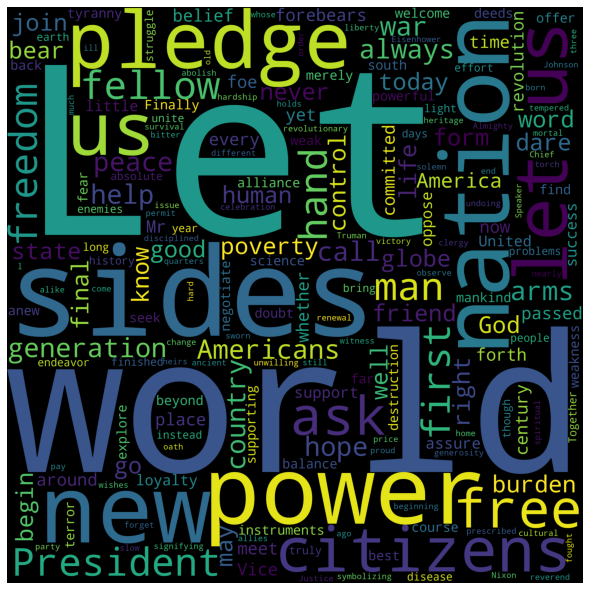

In [158]:
## Wordcloud

##Kennedy

stop_words_kenn = nltk.corpus.stopwords.words('english')
stop_words_kenn.extend(['--'])

corpus_kenn = kennedy_df['Kennedy'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words_kenn]))
wc_kenn = ' '.join(corpus_kenn)

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_kenn) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print('\033[1m' + "Word Cloud for Kennedy Speech:" + '\033[0m','\n')
plt.show()


Word Cloud for Nixon Speech: 



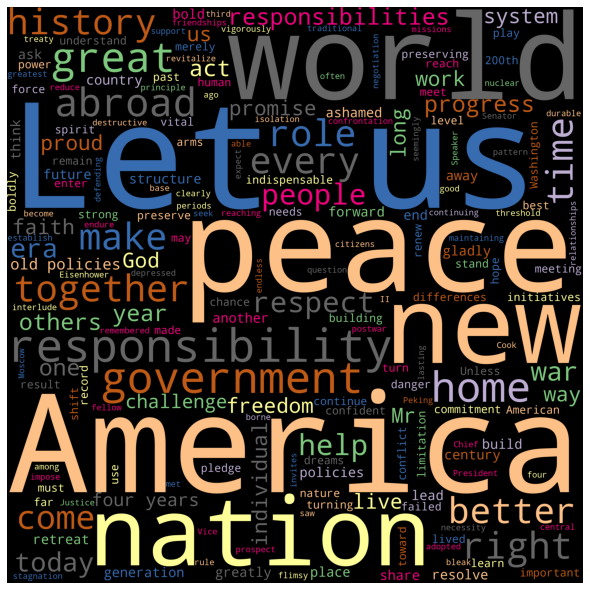

In [159]:
##Nixon

stop_words_nixon = nltk.corpus.stopwords.words('english')
stop_words_nixon.extend(['--'])

corpus_nixon = nixon_df['Nixon'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words_nixon]))
wc_nixon = ' '.join(corpus_nixon)

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, colormap='Accent', random_state=100).generate(wc_nixon) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print('\033[1m' + "Word Cloud for Nixon Speech:" + '\033[0m','\n')
plt.show()

Word Cloud for Roosevelt Speech: 



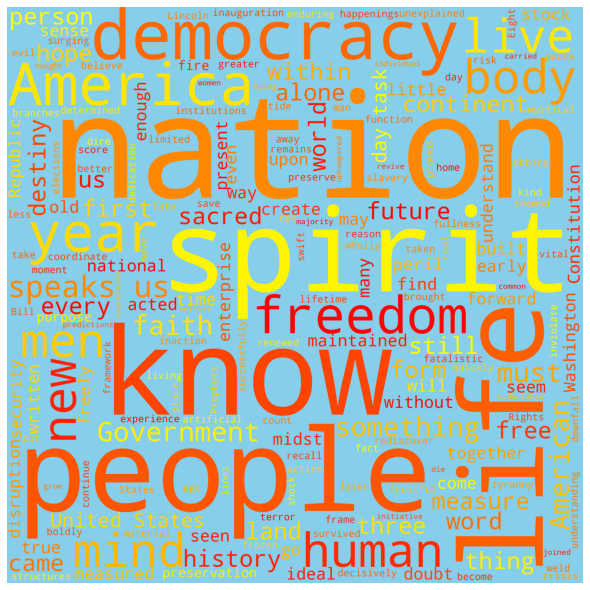

In [160]:
##Roosevelt

stop_words_roose = nltk.corpus.stopwords.words('english')
stop_words_roose.extend(['--'])

corpus_roose = roosevelt_df['Roosevelt'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words_roose]))
wc_roose = ' '.join(corpus_roose)

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='skyblue', colormap= 'autumn',
                min_font_size = 10, random_state=100).generate(wc_roose) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print('\033[1m' + "Word Cloud for Roosevelt Speech:" + '\033[0m','\n')
plt.show()